In [ ]:
import pandas as pd


# merge metadata from multiple files
mit_file ="MIT_AST_metadata/garden_30102023_metadata.xlsx"
mit_df = pd.read_excel(mit_file)
mit_df.head()

In [ ]:
#get birdNet metadata
birdnet_file = "metadata/garden_30102023_metadata_birdnet_labeled.xlsx"
birdnet_df = pd.read_excel(birdnet_file)
birdnet_df.head()

In [ ]:
# add BirdNET column to MIT dataframe and fill it with "label" values from BirdNET dataframe
mit_df['BirdNET'] = birdnet_df['label']
mit_df.head()

In [ ]:
#get rows withnot  Nan values in BirdNET column
birdnet_labeled = mit_df[mit_df['BirdNET'].notna()]
birdnet_labeled.head()


In [7]:
#save the labeled data to a new file
mit_df.to_excel("metadata/garden_30102023_metadata_birdnet_labeled_mit_ast_copy.xlsx", index=False)

In [8]:
# script to merge metadata from multiple files

def merge_metadata(mit_file, birdnet_file, output_file):
    mit_df = pd.read_excel(mit_file)
    birdnet_df = pd.read_excel(birdnet_file)
    mit_df['BirdNET'] = birdnet_df['label']
    mit_df.to_excel(output_file, index=False)

In [22]:

# construct mit_file, birdnet_file and output_file from part "garden_30102023" 
# and call merge_metadata function
garden = "garden_30102023"
mit_file = f"MIT_AST_metadata/{garden}_metadata.xlsx"
birdnet_file = f"metadata/{garden}_metadata_birdnet_labeled.xlsx"
output_file = f"metadata/{garden}_metadata_birdnet_labeled_mit_ast.xlsx"
merge_metadata(mit_file, birdnet_file, output_file)


In [34]:
# merge metadata from multiple files in a folder
import os
import glob

def merge_metadata(folder):
    dfs = []
    labeled_files = glob.glob(f"{folder}/*_metadata_birdnet_labeled_mit_ast.xlsx")
    for file in labeled_files:
       # get df from file
        df = pd.read_excel(file)
         #append df to meta_df
        dfs.append(df)
    meta_df = pd.concat(dfs, ignore_index=True)    
    return meta_df
        


In [35]:
#get meta_df from folder "metadata"
folder = "metadata"

metadata = merge_metadata(folder)
metadata.shape

(347650, 29)

In [65]:
metadata.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,sessionId,time,filename,th1,th1_value,th2,th2_value,...,winddirAvg,uvHigh,solarRadiationHigh,lon,lat,BirdNET,MIT_AST_label,sound_class_label,BirdNET_Processed,sound_class_label_Processed
0,0.0,0,0,test,_2023_12_16_18_02_08,garden_16122023/0/er_file_2023_12_16_18_02_08.wav,0.154655,0.22,0.921054,0.5,...,204.0,0.0,0.0,5.462251,51.417782,NaN,Rustling leaves,NaN,Non-bird,Non-bird
1,1.0,1,1,test,_2023_12_16_18_02_11,garden_16122023/0/er_file_2023_12_16_18_02_11.wav,0.545252,0.22,0.869510,0.5,...,204.0,0.0,0.0,5.462251,51.417782,NaN,Heart murmur,NaN,Non-bird,Non-bird
2,2.0,2,2,test,_2023_12_16_18_02_14,garden_16122023/0/er_file_2023_12_16_18_02_14.wav,0.262045,0.22,0.680537,0.5,...,204.0,0.0,0.0,5.462251,51.417782,NaN,Knock,NaN,Non-bird,Non-bird
3,3.0,3,3,test,_2023_12_16_18_02_17,garden_16122023/0/er_file_2023_12_16_18_02_17.wav,0.465999,0.22,0.746294,0.5,...,204.0,0.0,0.0,5.462251,51.417782,NaN,Door,NaN,Non-bird,Non-bird
4,4.0,4,4,test,_2023_12_16_18_02_23,garden_16122023/0/er_file_2023_12_16_18_02_23.wav,0.245217,0.22,0.715698,0.5,...,193.0,0.0,0.0,5.462251,51.417782,NaN,Door,NaN,Non-bird,Non-bird


In [40]:
# rows where BirdNET column is not NaN
birdnet_labeled = metadata[metadata['BirdNET'].notna()]
birdnet_labeled.shape

(46337, 29)

In [47]:
# create a list of labels from 'MIT_AST_label' column where 'sound_class_label' is 'bird'
#birdnet_labeled['MIT_AST_label'][birdnet_labeled['sound_class_label'] == 'bird'].value_counts()
# save in a list
ast_bird_labels = birdnet_labeled['MIT_AST_label'][birdnet_labeled['sound_class_label'] == 'bird'].value_counts().index.tolist()
ast_bird_labels

['Bird',
 'Caw',
 'Chirp, tweet',
 'Fowl',
 'Crow',
 'Owl',
 'Bird vocalization, bird call, bird song',
 'Squawk',
 'Hoot',
 'Turkey',
 'Gobble',
 'Duck',
 'Quack',
 'Honk',
 'Chicken, rooster',
 'Bird flight, flapping wings',
 'Pigeon, dove']

In [55]:
metadata.to_excel("metadata/garden_concat_metadata_birdnet_labeled_mit_ast_.xlsx", index=False)



In [ ]:
# get maetadata from file
metadata_file = "metadata/garden_concat_metadata_birdnet_labeled_mit_ast_.xlsx"
metadata = pd.read_excel(metadata_file)

In [6]:

# Preprocess 'BirdNET' labels: 'Bird' for any species, 'Non-bird' for NaNs
metadata['BirdNET_Processed'] = metadata['BirdNET'].apply(lambda x: 'Bird' if pd.notna(x) else 'Non-bird')

# Preprocess 'sound_class_labels': 'Bird' if 'bird', 'Non-bird' for any other class
metadata['sound_class_label_Processed'] = metadata['sound_class_label'].apply(lambda x: 'Bird' if x == 'bird' else 'Non-bird')

In [12]:
metadata.shape

(347650, 31)

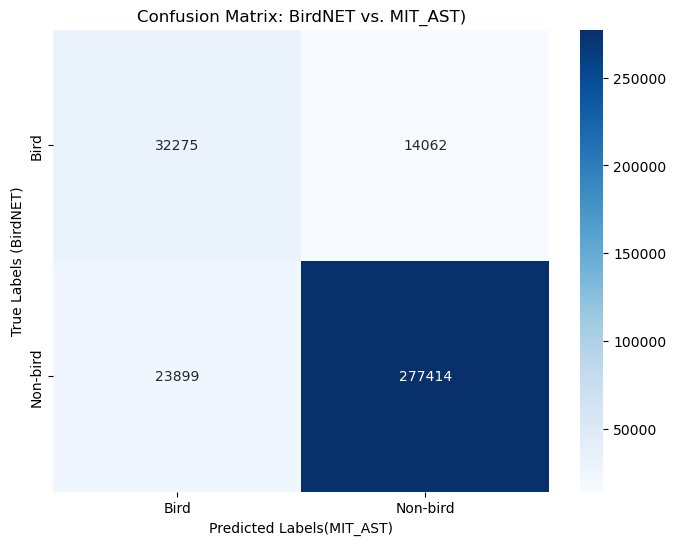

In [11]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Generate the Confusion Matrix
cm = confusion_matrix(metadata['BirdNET_Processed'], metadata['sound_class_label_Processed'], labels=['Bird', 'Non-bird'])

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, xticklabels=['Bird', 'Non-bird'], yticklabels=['Bird', 'Non-bird'])
ax.set_xlabel('Predicted Labels(MIT_AST)')
ax.set_ylabel('True Labels (BirdNET)')
ax.set_title('Confusion Matrix: BirdNET vs. MIT_AST)')
plt.show()


In [14]:
# get TP_df
TP_df = metadata[(metadata['BirdNET_Processed'] == 'Bird') & (metadata['sound_class_label_Processed'] == 'Bird')]
TP_df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,sessionId,time,filename,th1,th1_value,th2,th2_value,...,winddirAvg,uvHigh,solarRadiationHigh,lon,lat,BirdNET,MIT_AST_label,sound_class_label,BirdNET_Processed,sound_class_label_Processed
1548,1548.0,1548,1548,test,_2023_12_17_5_18_55,garden_16122023/15/er_file_2023_12_17_5_18_55.wav,0.181611,0.22,0.842909,0.5,...,184.0,0.0,0.0,5.462251,51.417782,Corvus monedula_Eurasian Jackdaw,Bird,bird,Bird,Bird
1549,1549.0,1549,1549,test,_2023_12_17_5_19_21,garden_16122023/15/er_file_2023_12_17_5_19_21.wav,0.145681,0.22,0.587710,0.5,...,184.0,0.0,0.0,5.462251,51.417782,Corvus monedula_Eurasian Jackdaw,Crow,bird,Bird,Bird
1550,1550.0,1550,1550,test,_2023_12_17_5_19_24,garden_16122023/15/er_file_2023_12_17_5_19_24.wav,0.172266,0.22,0.714834,0.5,...,184.0,0.0,0.0,5.462251,51.417782,Corvus monedula_Eurasian Jackdaw,Caw,bird,Bird,Bird
1556,1556.0,1556,1556,test,_2023_12_17_5_22_20,garden_16122023/15/er_file_2023_12_17_5_22_20.wav,0.460594,0.22,0.850221,0.5,...,184.0,0.0,0.0,5.462251,51.417782,Corvus monedula_Eurasian Jackdaw,Fowl,bird,Bird,Bird
1557,1557.0,1557,1557,test,_2023_12_17_5_22_23,garden_16122023/15/er_file_2023_12_17_5_22_23.wav,0.343157,0.22,0.858115,0.5,...,184.0,0.0,0.0,5.462251,51.417782,Corvus monedula_Eurasian Jackdaw,Caw,bird,Bird,Bird


In [50]:
# get FN_df

FN_df = metadata[(metadata['BirdNET_Processed'] == 'Bird') & (metadata['sound_class_label_Processed'] == 'Non-bird')]
FN_df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,sessionId,time,filename,th1,th1_value,th2,th2_value,...,winddirAvg,uvHigh,solarRadiationHigh,lon,lat,BirdNET,MIT_AST_label,sound_class_label,BirdNET_Processed,sound_class_label_Processed
76,76.0,76,76,test,_2023_12_16_18_19_29,garden_16122023/0/er_file_2023_12_16_18_19_29.wav,0.277137,0.22,0.890065,0.5,...,203.0,0.0,0.0,5.462251,51.417782,Corvus frugilegus_Rook,Animal,NaN,Bird,Non-bird
1004,1004.0,1004,1004,test,_2023_12_16_23_51_14,garden_16122023/10/er_file_2023_12_16_23_51_14...,0.246619,0.22,0.750399,0.5,...,199.0,0.0,0.0,5.462251,51.417782,Corvus frugilegus_Rook,Clip-clop,NaN,Bird,Non-bird
1094,1094.0,1094,1094,test,_2023_12_17_0_35_43,garden_16122023/10/er_file_2023_12_17_0_35_43.wav,0.531213,0.22,0.800226,0.5,...,197.0,0.0,0.0,5.462251,51.417782,Branta canadensis_Canada Goose,"Heart sounds, heartbeat",NaN,Bird,Non-bird
1364,1364.0,1364,1364,test,_2023_12_17_3_09_20,garden_16122023/13/er_file_2023_12_17_3_09_20.wav,0.279151,0.22,0.843628,0.5,...,NaN,NaN,NaN,5.462251,51.417782,Corvus frugilegus_Rook,"Heart sounds, heartbeat",NaN,Bird,Non-bird
1464,1464.0,1464,1464,test,_2023_12_17_4_38_32,garden_16122023/14/er_file_2023_12_17_4_38_32.wav,0.146725,0.22,0.769377,0.5,...,NaN,NaN,NaN,5.462251,51.417782,Branta canadensis_Canada Goose,"Heart sounds, heartbeat",NaN,Bird,Non-bird


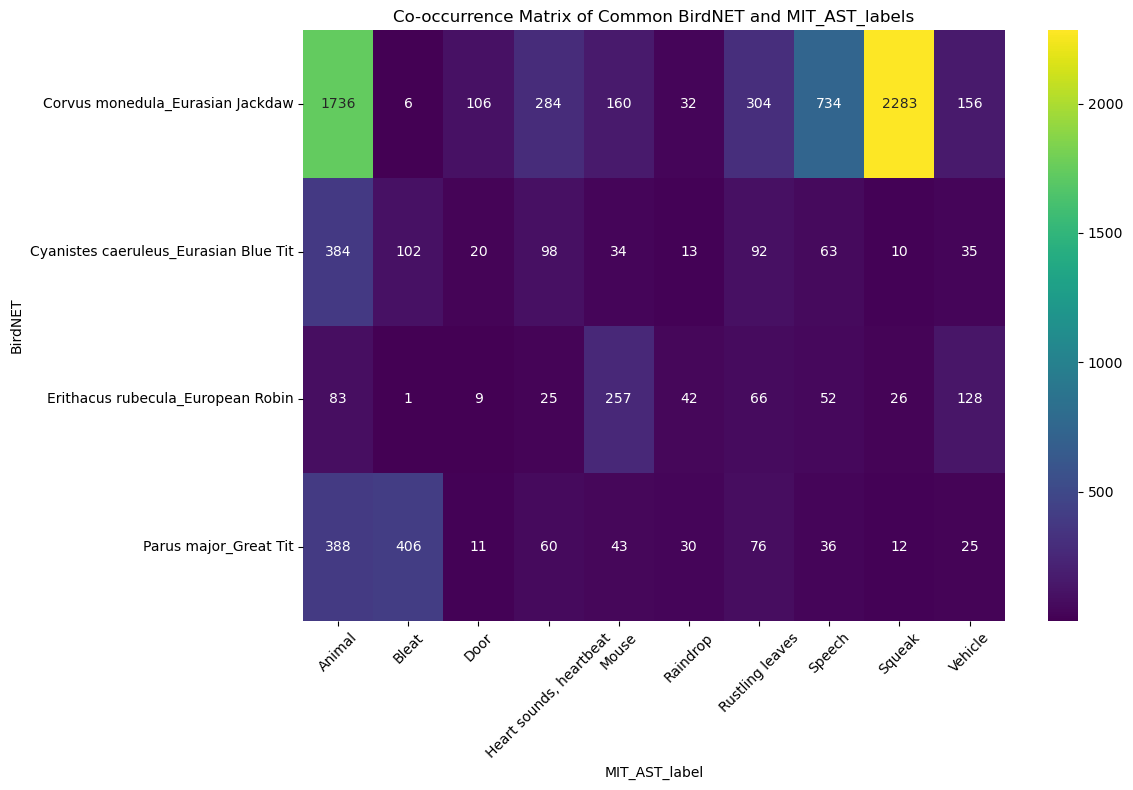

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming FN_df is your DataFrame

# Get the most common 4 'BirdNET' labels
birdnet_labels = FN_df['BirdNET'].value_counts().head(4).index.tolist()

# Get the most common 10 'MIT_AST_label' labels
ast_labels = FN_df['MIT_AST_label'].value_counts().head(10).index.tolist()

# Filter the DataFrame for rows that have the most common labels
filtered_df = FN_df[FN_df['BirdNET'].isin(birdnet_labels) & FN_df['MIT_AST_label'].isin(ast_labels)]

# Create a crosstab matrix of the occurrences of each label in both columns
cooccurrence_matrix = pd.crosstab(filtered_df['BirdNET'], filtered_df['MIT_AST_label'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cooccurrence_matrix, annot=True, fmt='d', cmap='viridis')

# Customizing the plot
plt.title('Co-occurrence Matrix of Common BirdNET and MIT_AST_labels')
plt.xlabel('MIT_AST_label')
plt.ylabel('BirdNET')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [15]:
# list of all TP_df all columns
TP_df.columns


Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'sessionId', 'time',
       'filename', 'th1', 'th1_value', 'th2', 'th2_value', 'th3', 'th3_value',
       'wudate', 'datetime', 'precipRate', 'pressureMax', 'dewptAvg',
       'windgustHigh', 'windspeedAvg', 'tempAve', 'humidityAvg', 'winddirAvg',
       'uvHigh', 'solarRadiationHigh', 'lon', 'lat', 'BirdNET',
       'MIT_AST_label', 'sound_class_label', 'BirdNET_Processed',
       'sound_class_label_Processed'],
      dtype='object')

In [17]:
# delete Unnamed columns from TP_df
TP_df = TP_df.loc[:, ~TP_df.columns.str.contains('^Unnamed')]
TP_df.shape


(32275, 28)

In [19]:
# Resample to aggregate counts per minute
TP_df.set_index('datetime', inplace=True)

TP_df.head()

,sessionId,time,filename,th1,th1_value,th2,th2_value,th3,th3_value,wudate,...,winddirAvg,uvHigh,solarRadiationHigh,lon,lat,BirdNET,MIT_AST_label,sound_class_label,BirdNET_Processed,sound_class_label_Processed
datetime,,,,,,,,,,,,,,,,,,,,,
2023-12-17 05:18:55,test,_2023_12_17_5_18_55,garden_16122023/15/er_file_2023_12_17_5_18_55.wav,0.181611,0.22,0.842909,0.5,0.311122,0.25,20231217,...,184.0,0.0,0.0,5.462251,51.417782,Corvus monedula_Eurasian Jackdaw,Bird,bird,Bird,Bird
2023-12-17 05:19:21,test,_2023_12_17_5_19_21,garden_16122023/15/er_file_2023_12_17_5_19_21.wav,0.145681,0.22,0.587710,0.5,0.015076,0.25,20231217,...,184.0,0.0,0.0,5.462251,51.417782,Corvus monedula_Eurasian Jackdaw,Crow,bird,Bird,Bird
2023-12-17 05:19:24,test,_2023_12_17_5_19_24,garden_16122023/15/er_file_2023_12_17_5_19_24.wav,0.172266,0.22,0.714834,0.5,0.123089,0.25,20231217,...,184.0,0.0,0.0,5.462251,51.417782,Corvus monedula_Eurasian Jackdaw,Caw,bird,Bird,Bird
2023-12-17 05:22:20,test,_2023_12_17_5_22_20,garden_16122023/15/er_file_2023_12_17_5_22_20.wav,0.460594,0.22,0.850221,0.5,0.079344,0.25,20231217,...,184.0,0.0,0.0,5.462251,51.417782,Corvus monedula_Eurasian Jackdaw,Fowl,bird,Bird,Bird
2023-12-17 05:22:23,test,_2023_12_17_5_22_23,garden_16122023/15/er_file_2023_12_17_5_22_23.wav,0.343157,0.22,0.858115,0.5,0.440088,0.25,20231217,...,184.0,0.0,0.0,5.462251,51.417782,Corvus monedula_Eurasian Jackdaw,Caw,bird,Bird,Bird


In [20]:
TP_df.shape

(32275, 27)

In [21]:
# Resample to aggregate counts per minute
TP_df_resampled_per_minute = TP_df.resample('min').count()
TP_df_resampled_per_minute.shape


(257051, 27)

In [29]:


# Group by time of day and count detections
bird_detections_by_minute = TP_df_resampled_per_minute.groupby(TP_df_resampled_per_minute.index.time).sum()
bird_detections_by_minute.head()

,sessionId,time,filename,th1,th1_value,th2,th2_value,th3,th3_value,wudate,...,winddirAvg,uvHigh,solarRadiationHigh,lon,lat,BirdNET,MIT_AST_label,sound_class_label,BirdNET_Processed,sound_class_label_Processed
00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:01:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:02:00,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
00:03:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:04:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


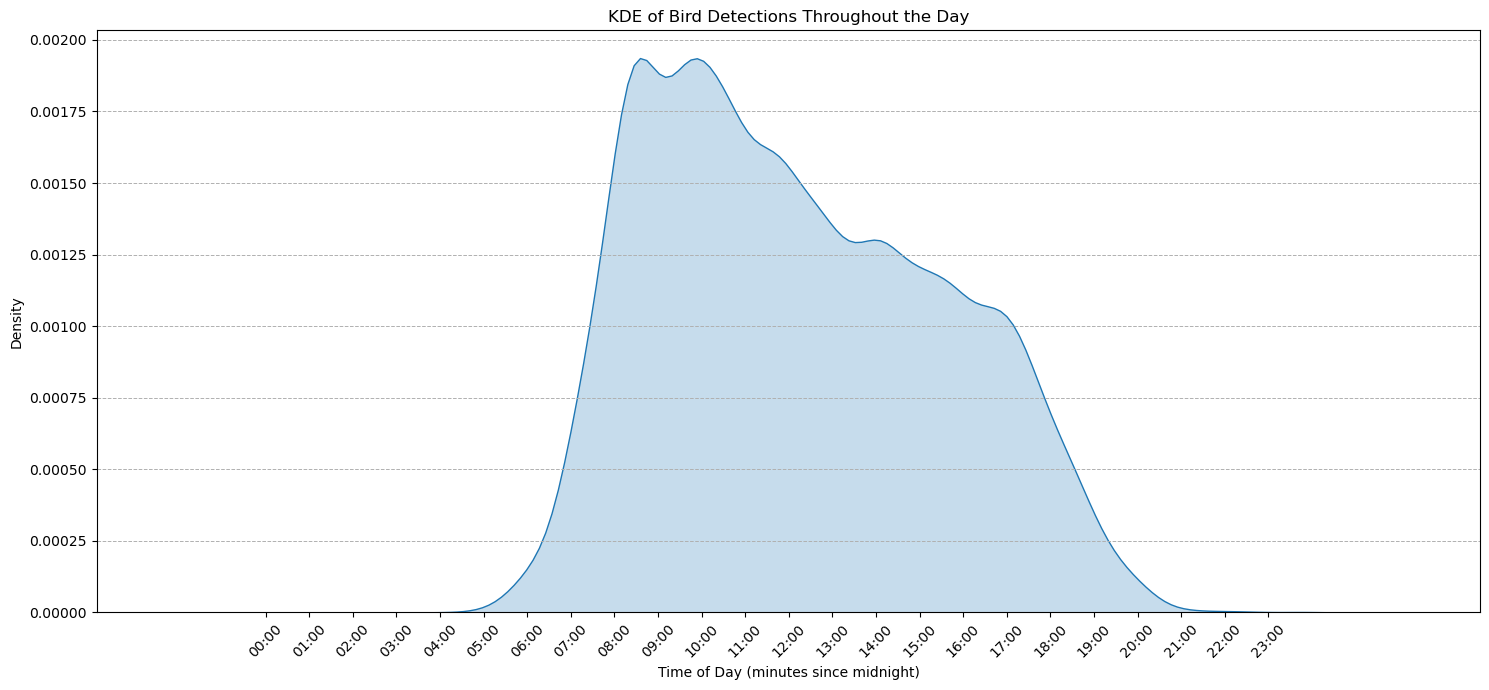

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming TP_df_resampled_per_minute is your resampled DataFrame
# Group by time of day and sum detections
bird_detections_by_minute = TP_df_resampled_per_minute.groupby(TP_df_resampled_per_minute.index.time).sum()

# Create a Series from the 'BirdNET_Processed' column with the time as the index
detections_series = pd.Series(bird_detections_by_minute['BirdNET_Processed'].values, index=bird_detections_by_minute.index)

# Convert the time to minutes since midnight to plot as numeric x-axis
minutes_since_midnight = detections_series.index.map(lambda t: t.hour * 60 + t.minute)

# Create a DataFrame for seaborn
kde_data = pd.DataFrame({
    'Time': minutes_since_midnight,
    'Detections': detections_series.values
})

# Create KDE plot
plt.figure(figsize=(15, 7))
sns.kdeplot(
    data=kde_data,
    x='Time',
    weights='Detections',
    bw_adjust=0.5,
    fill=True
)

# Customizing the plot
plt.title('KDE of Bird Detections Throughout the Day')
plt.xlabel('Time of Day (minutes since midnight)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Convert the x-ticks back to time format
time_ticks = range(0, 24 * 60, 60)  # Every hour
time_labels = [f'{t//60:02d}:{t%60:02d}' for t in time_ticks]
plt.xticks(time_ticks, time_labels, rotation=45)

plt.tight_layout()
plt.show()


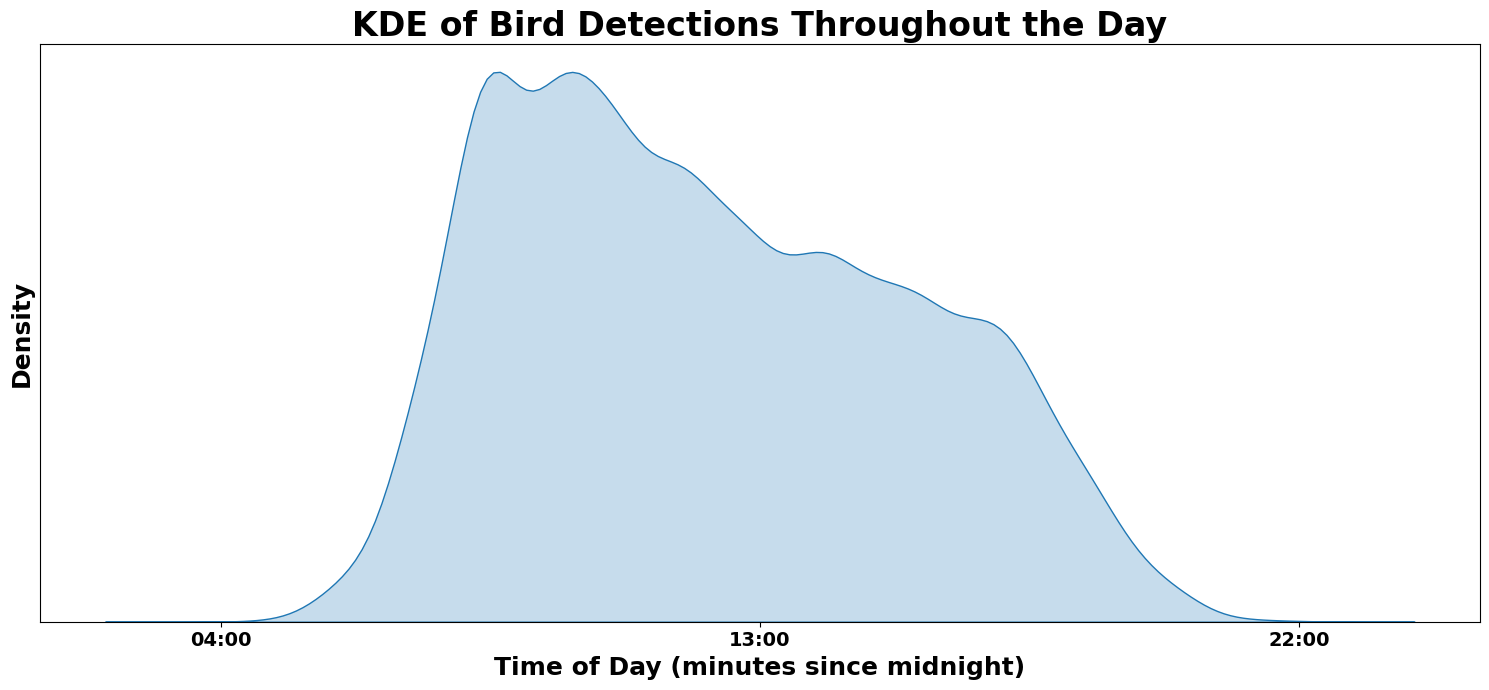

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming TP_df_resampled_per_minute is your resampled DataFrame
# Group by time of day and sum detections
bird_detections_by_minute = TP_df_resampled_per_minute.groupby(TP_df_resampled_per_minute.index.time).sum()

# Create a Series from the 'BirdNET_Processed' column with the time as the index
detections_series = pd.Series(bird_detections_by_minute['BirdNET_Processed'].values, index=bird_detections_by_minute.index)

# Convert the time to minutes since midnight to plot as numeric x-axis
minutes_since_midnight = detections_series.index.map(lambda t: t.hour * 60 + t.minute)
# Convert minutes_since_midnight to a pandas Series to use the 'between' method
minutes_since_midnight_series = pd.Series(minutes_since_midnight, index=detections_series.index)

# Filter out data outside the relevant time frame (04:00 - 22:00)
relevant_data = minutes_since_midnight_series.between(4*60, 22*60)

# Filter the kde_data DataFrame using the relevant_data mask
kde_data = pd.DataFrame({
    'Time': minutes_since_midnight[relevant_data],
    'Detections': detections_series.values[relevant_data]
})

# Create KDE plot
plt.figure(figsize=(15, 7))
sns.kdeplot(
    data=kde_data,
    x='Time',
    weights='Detections',
    bw_adjust=0.5,
    fill=True
)

# Customizing the plot for better readability in scientific papers
plt.title('KDE of Bird Detections Throughout the Day', fontsize=24, fontweight='bold')  # Title with larger and bold font
plt.xlabel('Time of Day (minutes since midnight)', fontsize=18, fontweight='bold')  # Larger and bold x label
plt.ylabel('Density', fontsize=18, fontweight='bold')  # Larger and bold y label
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Determine the positions for the first, median, and last ticks based on the filtered range
first_tick = 4 * 60  # 04:00 in minutes since midnight
last_tick = 22 * 60  # 22:00 in minutes since midnight
median_tick = (first_tick + last_tick) // 2  # Calculate median time

# Set the x-axis ticks and labels to first, median, and last
plt.xticks([first_tick, median_tick, last_tick], 
           [f'{first_tick//60:02d}:{first_tick%60:02d}', 
            f'{median_tick//60:02d}:{median_tick%60:02d}', 
            f'{last_tick//60:02d}:{last_tick%60:02d}'], 
           fontsize=14, fontweight='bold')
plt.yticks([])  # This hides the y-ticks


plt.tight_layout()
plt.show()




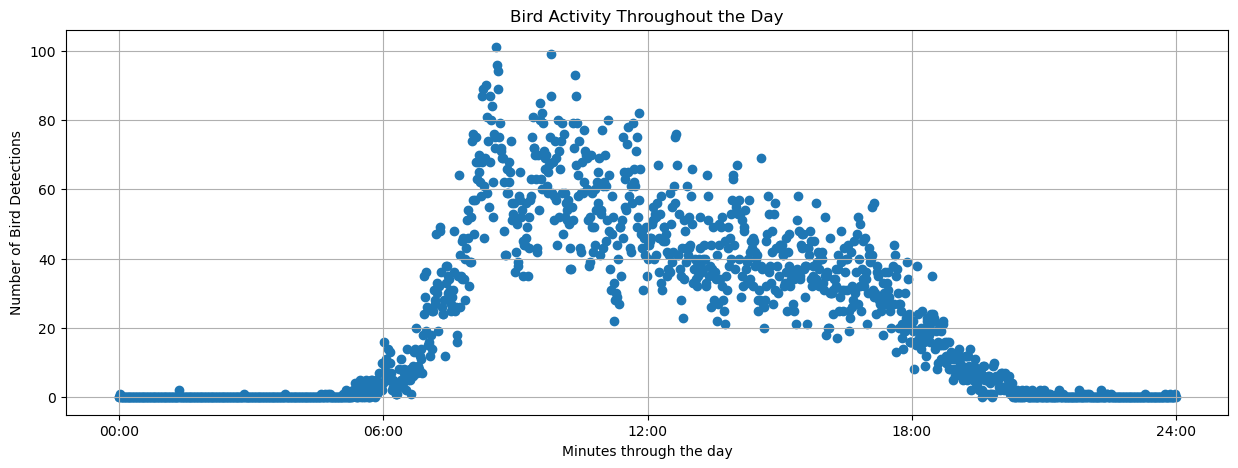

In [24]:
plt.figure(figsize=(15, 5))
plt.scatter(minutes_past_midnight, bird_detections_by_minute['BirdNET_Processed'])
plt.xticks([0, 360, 720, 1080, 1440], ['00:00', '06:00', '12:00', '18:00', '24:00'])
plt.title('Bird Activity Throughout the Day')
plt.xlabel('Minutes through the day')
plt.ylabel('Number of Bird Detections')
plt.grid(True)
plt.show()


In [25]:
# make a def to get bird activity per minute throughout the day for a given dataframe
def plot_bird_activity_per_minute(df):
    # Resample to aggregate counts per minute
    df_resampled_per_minute = df.resample('min').count()
    # Group by time of day and count detections
    detections_by_minute = df_resampled_per_minute.groupby(df_resampled_per_minute.index.time).sum()
    # Convert time objects to minutes past midnight
    minutes_past_midnight = [(t.hour * 60 + t.minute) for t in detections_by_minute.index]
    plt.figure(figsize=(15, 5))
    plt.scatter(minutes_past_midnight, detections_by_minute['BirdNET_Processed'], marker='o', linestyle='-')
    plt.xticks(range(0, 1441, 60), ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '24:00'])
    plt.title('Bird Activity Throughout the Day')
    plt.xlabel('Minutes Past Midnight')
    plt.ylabel('Number of Bird Detections')
    plt.grid(True)
    plt.show()



In [26]:
# Check the first and last dates in the DataFrame's index
print(TP_df.index.min(), TP_df.index.max())


2023-08-11 17:59:40 2024-02-06 06:09:57


In [27]:
# Sort the DataFrame by its index (DatetimeIndex) if not already sorted
TP_df = TP_df.sort_index()
# Verify the index is now monotonic increasing
print(TP_df.index.is_monotonic_increasing)



True


In [161]:
september =TP_df.loc['2023-08-30 00:00:00':'2023-09-30 23:59:59']
september.shape

(6077, 30)

In [166]:
december = TP_df.loc['2023-11-30 00:00:00':'2023-12-31 23:59:59']
december.shape

(3762, 30)

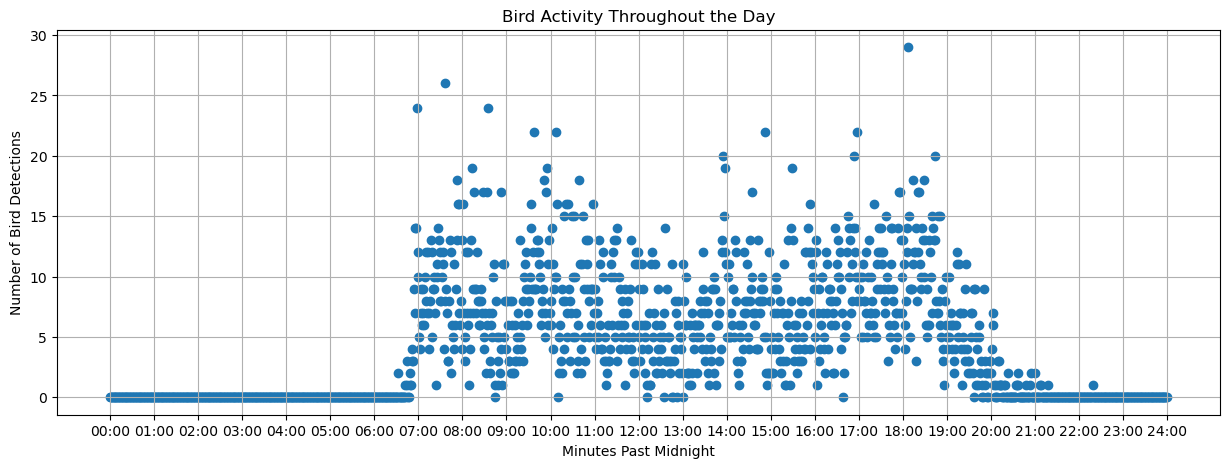

In [162]:
# bird activity over a week in september
plot_bird_activity_per_minute(september)


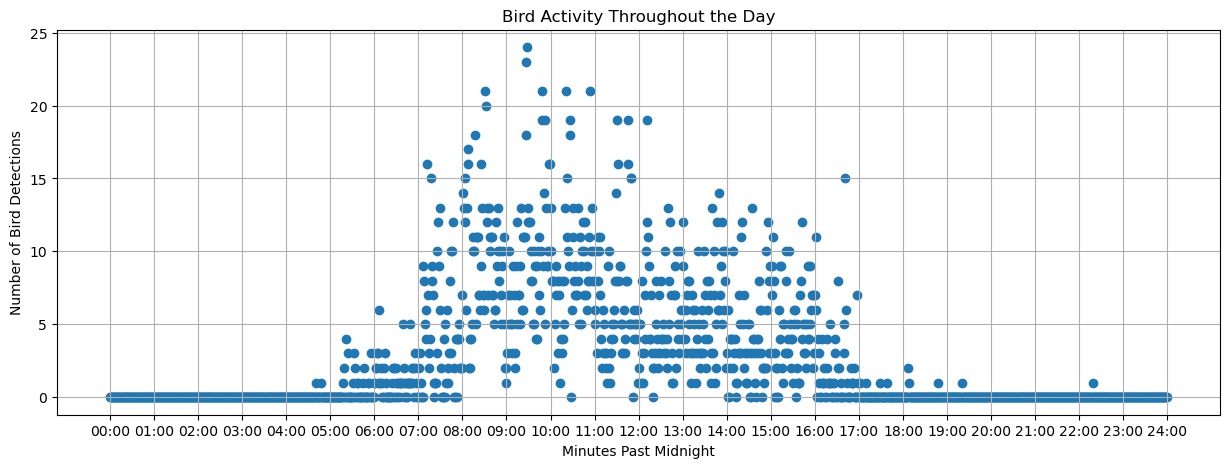

In [165]:
plot_bird_activity_per_minute(december)

In [168]:
TP_df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,sessionId,time,filename,th1,th1_value,th2,th2_value,...,winddirAvg,uvHigh,solarRadiationHigh,lon,lat,BirdNET,MIT_AST_label,sound_class_label,BirdNET_Processed,sound_class_label_Processed
datetime,,,,,,,,,,,,,,,,,,,,,
2023-08-11 17:59:40,3.0,3,3,test,_2023_08_11_17_59_40,garden_11082023/0/er_file_2023_08_11_17_59_40.wav,0.139752,0.22,0.536369,0.5,...,188.0,4.0,468.9,5.462251,51.417782,Columba palumbus_Common Wood-Pigeon,Caw,bird,Bird,Bird
2023-08-11 17:59:43,4.0,4,4,test,_2023_08_11_17_59_43,garden_11082023/0/er_file_2023_08_11_17_59_43.wav,0.269019,0.22,0.753446,0.5,...,188.0,4.0,468.9,5.462251,51.417782,Columba palumbus_Common Wood-Pigeon,Bird,bird,Bird,Bird
2023-08-11 17:59:54,7.0,7,7,test,_2023_08_11_17_59_54,garden_11082023/0/er_file_2023_08_11_17_59_54.wav,0.167738,0.22,0.883117,0.5,...,188.0,4.0,468.9,5.462251,51.417782,Corvus monedula_Eurasian Jackdaw,Squawk,bird,Bird,Bird
2023-08-11 18:00:03,9.0,9,9,test,_2023_08_11_18_00_03,garden_11082023/0/er_file_2023_08_11_18_00_03.wav,0.231605,0.22,0.933132,0.5,...,188.0,4.0,468.9,5.462251,51.417782,Corvus monedula_Eurasian Jackdaw,Caw,bird,Bird,Bird
2023-08-11 18:00:13,11.0,11,11,test,_2023_08_11_18_00_13,garden_11082023/0/er_file_2023_08_11_18_00_13.wav,0.294629,0.22,0.791567,0.5,...,188.0,4.0,468.9,5.462251,51.417782,Columba palumbus_Common Wood-Pigeon,Bird,bird,Bird,Bird


In [172]:

def daily_activity_over_week(df):
    # Mapping from day of the week to day names
    day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
                4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

    # Add a column with the day name
    df['day_name'] = df.index.dayofweek.map(day_names)

    # Ensure the order of days when plotting
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


    # Group by the new day_name column and count bird detections
    daily_activity = df.groupby('day_name').size().reindex(day_order)

    # Plotting
    daily_activity.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Bird Activity by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Bird Detections')
    plt.xticks(rotation=45)  # Rotate the x-tick labels for better readability
    plt.show()



/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_61026/2453086915.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_name'] = df.index.dayofweek.map(day_names)


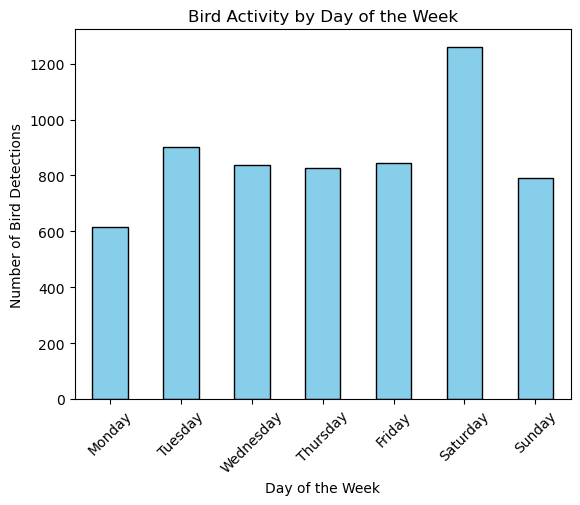

In [173]:
daily_activity_over_week(september)


/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_61026/2453086915.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_name'] = df.index.dayofweek.map(day_names)


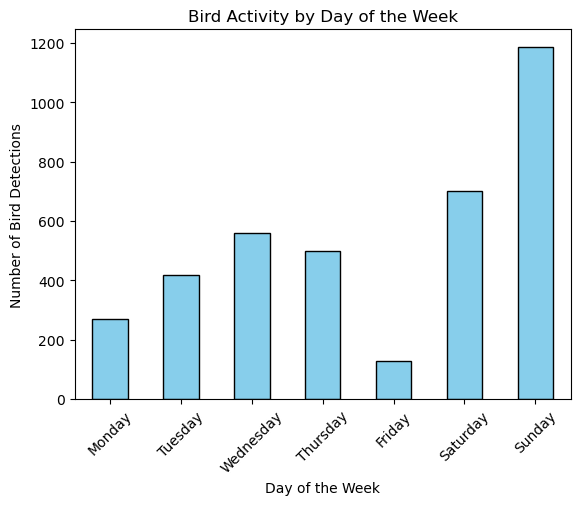

In [174]:
daily_activity_over_week(december)

In [64]:
# get the list of all unique labels in the 'BirdNET' column and count the number of each label
birdnet_labels = metadata['BirdNET'].value_counts()
most_common_birds = birdnet_labels.head(4).index.to_list()
most_common_birds


['Corvus monedula_Eurasian Jackdaw',
 'Cyanistes caeruleus_Eurasian Blue Tit',
 'Parus major_Great Tit',
 'Streptopelia decaocto_Eurasian Collared-Dove']

/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_61026/1570642161.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bird_df_resampled_per_hour = bird_df.resample('H').count()
/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_61026/1570642161.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bird_df_resampled_per_hour = bird_df.resample('H').count()
/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_61026/1570642161.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bird_df_resampled_per_hour = bird_df.resample('H').count()


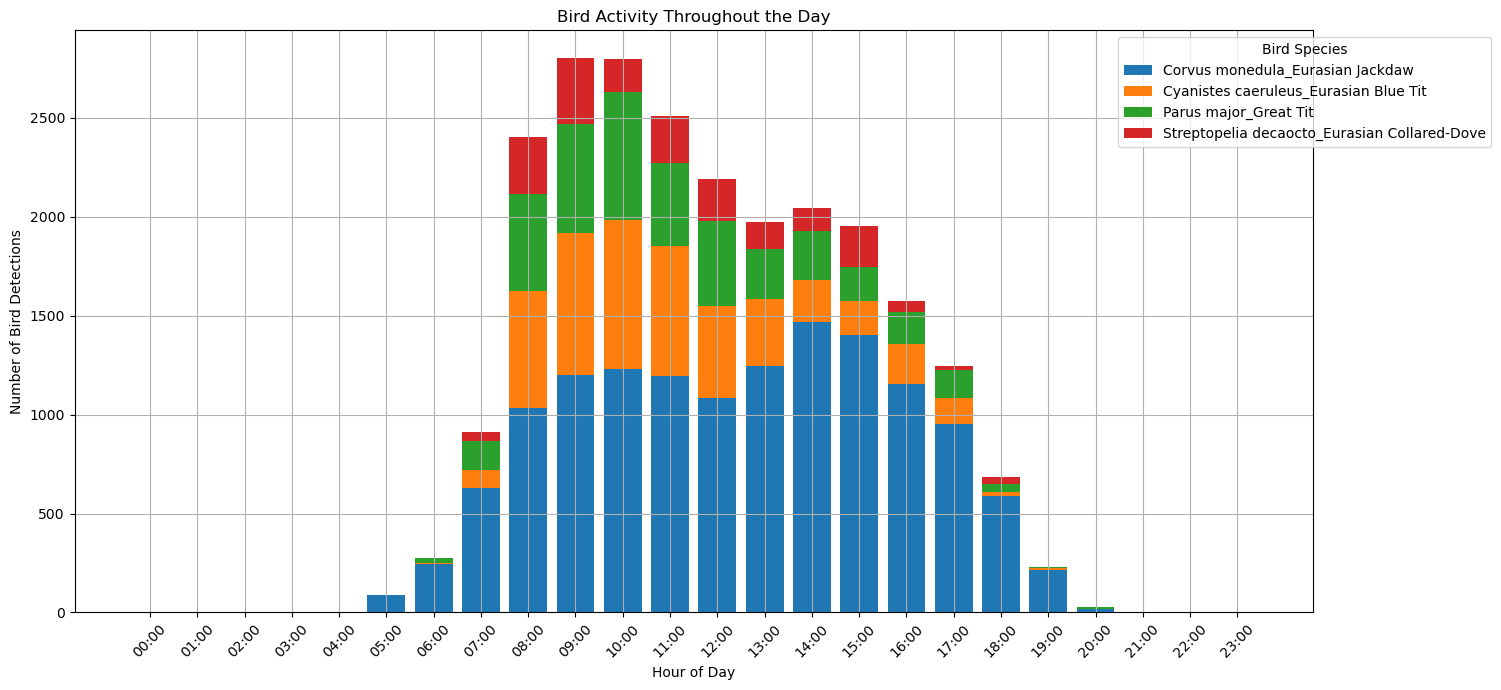

In [209]:
import matplotlib.pyplot as plt

def plot_bird_activity_per_hour_stacked(df, bird_names):
    plt.figure(figsize=(15, 7))
    
    # Initialize a dictionary to hold the resampled data for each bird
    bird_data_per_hour = {}
    
    # The bottom of the stack starts at 0
    stack_bottom = None
    
    for bird in bird_names:
        # Filter for the current bird
        bird_df = df[df['BirdNET'] == bird]
        
        # Resample to aggregate counts per hour
        bird_df_resampled_per_hour = bird_df.resample('H').count()
        
        # Group by hour and count detections
        detections_by_hour = bird_df_resampled_per_hour.groupby(bird_df_resampled_per_hour.index.hour).sum()
        
        bird_data_per_hour[bird] = detections_by_hour['BirdNET_Processed']
        
        # Plot the activity as stacked bars for each bird
        plt.bar(range(24), bird_data_per_hour[bird], bottom=stack_bottom, label=bird)
        
        # Update the stack_bottom
        if stack_bottom is None:
            stack_bottom = bird_data_per_hour[bird]
        else:
            stack_bottom += bird_data_per_hour[bird]
    
    # Customize the plot
    plt.xticks(range(24), [f'{hour:02d}:00' for hour in range(24)], rotation=45)
    plt.title('Bird Activity Throughout the Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Bird Detections')
    plt.legend(title='Bird Species', loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# You will need to make sure your DataFrame 'df' is indexed by datetime to use this function.
# Replace 'TP_df' with your actual DataFrame variable name and 'most_common_birds' with your actual bird species names.
plot_bird_activity_per_hour_stacked(TP_df, most_common_birds)


/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_86343/3076464925.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(bird_names))
/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_86343/3076464925.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bird_df_resampled_per_hour = bird_df.resample('H').count()
/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_86343/3076464925.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bird_df_resampled_per_hour = bird_df.resample('H').count()
/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_86343/3076464925.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please

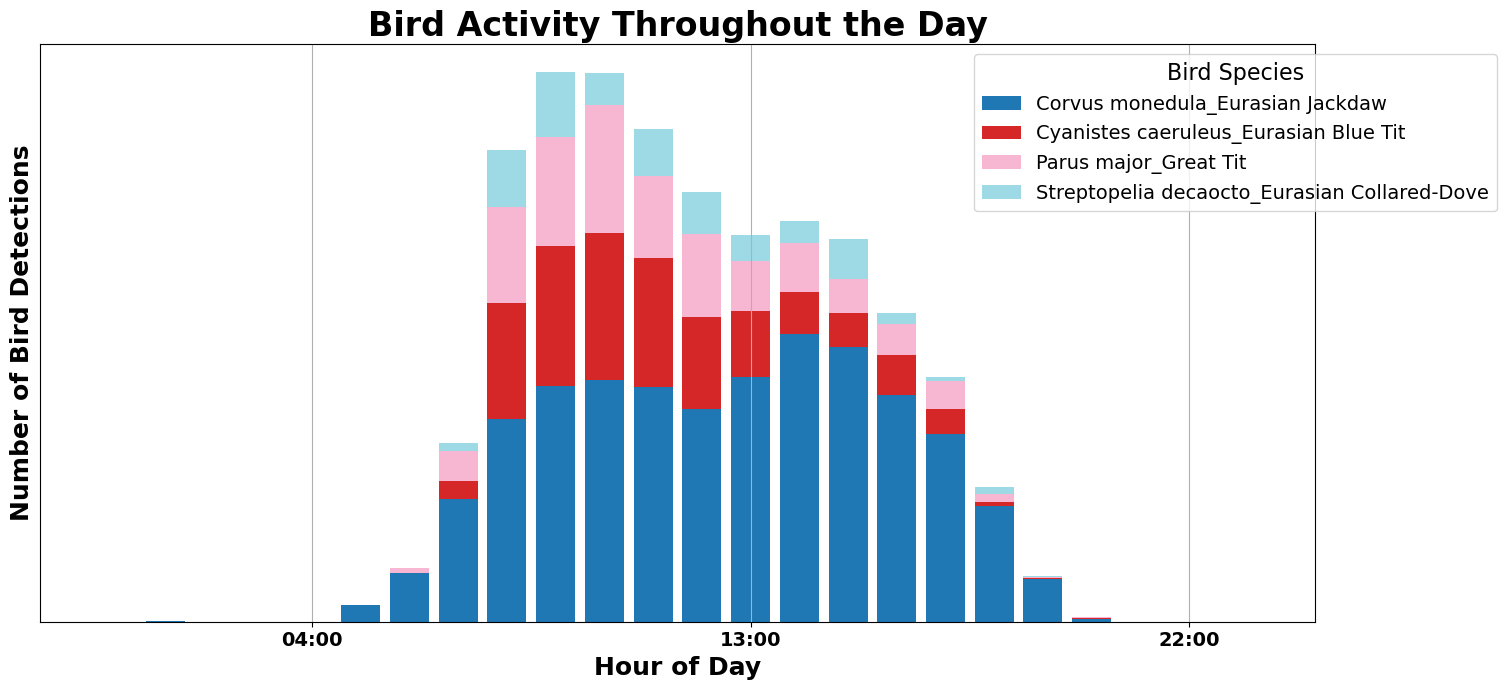

In [66]:
import matplotlib.pyplot as plt

def plot_bird_activity_per_hour_stacked(df, bird_names):
    plt.figure(figsize=(15, 7))
    
    # Initialize a dictionary to hold the resampled data for each bird
    bird_data_per_hour = {}
    
    # The bottom of the stack starts at 0
    stack_bottom = None
    
    # Define a color map or list of colors for consistency
    colors = plt.cm.get_cmap('tab20', len(bird_names))

    for idx, bird in enumerate(bird_names):
        # Filter for the current bird
        bird_df = df[df['BirdNET'] == bird]
        
        # Resample to aggregate counts per hour
        bird_df_resampled_per_hour = bird_df.resample('H').count()
        
        # Group by hour and count detections
        detections_by_hour = bird_df_resampled_per_hour.groupby(bird_df_resampled_per_hour.index.hour).sum()
        
        bird_data_per_hour[bird] = detections_by_hour['BirdNET_Processed']
        
        # Plot the activity as stacked bars for each bird with consistent colors
        plt.bar(range(24), bird_data_per_hour[bird], bottom=stack_bottom, label=bird, color=colors(idx))
        
        # Update the stack_bottom
        if stack_bottom is None:
            stack_bottom = bird_data_per_hour[bird]
        else:
            stack_bottom += bird_data_per_hour[bird]
    
    # Customize the plot for scientific paper readability
    # Set custom x-ticks to show only 04:00, 13:00, and 22:00
    custom_hours = [4, 13, 22]
    plt.xticks(custom_hours, [f'{hour:02d}:00' for hour in custom_hours], fontsize=14, fontweight='bold')

    plt.yticks(fontsize=14, fontweight='bold')  # Only the font size and style is set here, y-ticks are already being handled
    plt.title('Bird Activity Throughout the Day', fontsize=24, fontweight='bold')
    plt.xlabel('Hour of Day', fontsize=18, fontweight='bold')
    plt.ylabel('Number of Bird Detections', fontsize=18, fontweight='bold')
    plt.legend(title='Bird Species', loc='upper right', bbox_to_anchor=(1.15, 1), fontsize=14, title_fontsize=16)
    plt.grid(True)
    
    # Hide the y-ticks
    plt.yticks([])  # This will hide the y-ticks as per previous instructions
    
    plt.tight_layout()
    plt.show()

# Ensure your DataFrame 'df' is indexed by datetime and replace 'TP_df' and 'most_common_birds' with your actual DataFrame and bird species names.
plot_bird_activity_per_hour_stacked(TP_df, most_common_birds)



In [245]:
TP_df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'sessionId', 'time',
       'filename', 'th1', 'th1_value', 'th2', 'th2_value', 'th3', 'th3_value',
       'wudate', 'precipRate', 'pressureMax', 'dewptAvg', 'windgustHigh',
       'windspeedAvg', 'tempAve', 'humidityAvg', 'winddirAvg', 'uvHigh',
       'solarRadiationHigh', 'lon', 'lat', 'BirdNET', 'MIT_AST_label',
       'sound_class_label', 'BirdNET_Processed', 'sound_class_label_Processed',
       'day_type', 'day_name', 'temp_bin', 'wind_bin', 'wind_speed_bin',
       'pressure_bin', 'solar_radiation_bin', 'winddir_bin'],
      dtype='object')

In [31]:
TP_df.head()

,sessionId,time,filename,th1,th1_value,th2,th2_value,th3,th3_value,wudate,...,uvHigh,solarRadiationHigh,lon,lat,BirdNET,MIT_AST_label,sound_class_label,BirdNET_Processed,sound_class_label_Processed,temp_bin
datetime,,,,,,,,,,,,,,,,,,,,,
2023-08-11 17:59:40,test,_2023_08_11_17_59_40,garden_11082023/0/er_file_2023_08_11_17_59_40.wav,0.139752,0.22,0.536369,0.5,0.010369,0.21,20230811,...,4.0,468.9,5.462251,51.417782,Columba palumbus_Common Wood-Pigeon,Caw,bird,Bird,Bird,"[25.0, 30.0)"
2023-08-11 17:59:43,test,_2023_08_11_17_59_43,garden_11082023/0/er_file_2023_08_11_17_59_43.wav,0.269019,0.22,0.753446,0.5,0.079263,0.21,20230811,...,4.0,468.9,5.462251,51.417782,Columba palumbus_Common Wood-Pigeon,Bird,bird,Bird,Bird,"[25.0, 30.0)"
2023-08-11 17:59:54,test,_2023_08_11_17_59_54,garden_11082023/0/er_file_2023_08_11_17_59_54.wav,0.167738,0.22,0.883117,0.5,0.073028,0.21,20230811,...,4.0,468.9,5.462251,51.417782,Corvus monedula_Eurasian Jackdaw,Squawk,bird,Bird,Bird,"[25.0, 30.0)"
2023-08-11 18:00:03,test,_2023_08_11_18_00_03,garden_11082023/0/er_file_2023_08_11_18_00_03.wav,0.231605,0.22,0.933132,0.5,0.099601,0.21,20230811,...,4.0,468.9,5.462251,51.417782,Corvus monedula_Eurasian Jackdaw,Caw,bird,Bird,Bird,"[25.0, 30.0)"
2023-08-11 18:00:13,test,_2023_08_11_18_00_13,garden_11082023/0/er_file_2023_08_11_18_00_13.wav,0.294629,0.22,0.791567,0.5,0.079554,0.21,20230811,...,4.0,468.9,5.462251,51.417782,Columba palumbus_Common Wood-Pigeon,Bird,bird,Bird,Bird,"[25.0, 30.0)"


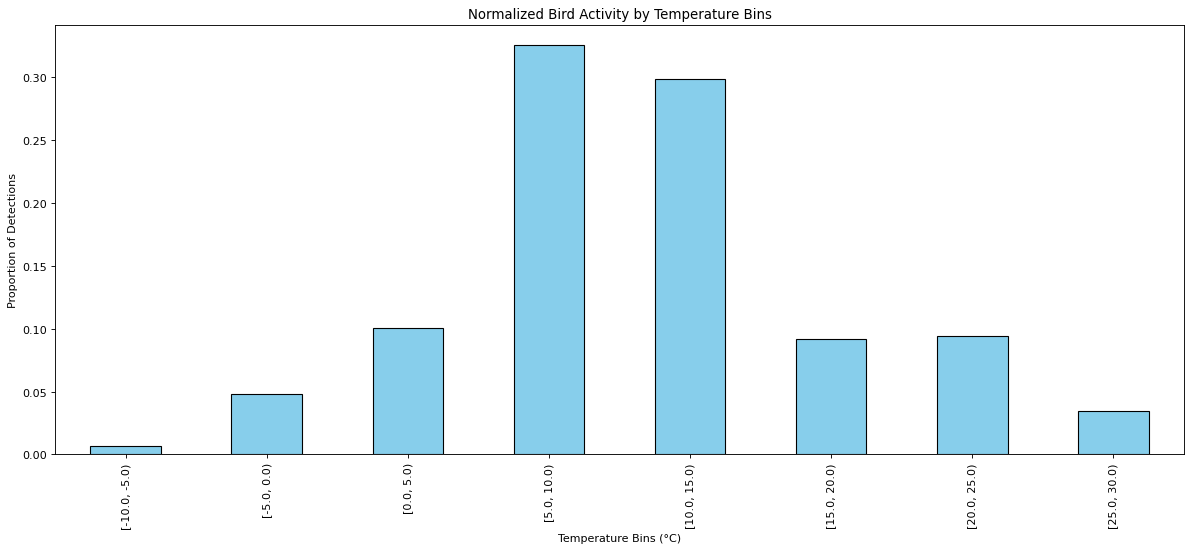

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_normalized_bird_activity_by_temperature_sorted(df, temp_column='temp_bin', activity_column='BirdNET_Processed', dpi=80):
    # Convert 'temp_bin' to string to enable consistent grouping
    df[temp_column] = df[temp_column].astype(str)

     # Remove rows where 'temp_bin' is 'nan'
    df = df[df[temp_column] != 'nan']
    
    # Group by the predefined temperature bins and count the bird detections
    activity_by_temp_bin = df.groupby(temp_column)[activity_column].count()

    # Normalize the bird detections to get the proportion in each bin
    total_detections = activity_by_temp_bin.sum()
    activity_by_temp_bin_normalized = activity_by_temp_bin / total_detections

    # Extract the lower bound of temperature bins for sorting, ensuring we capture negative values
    # The regex pattern is modified to capture optional negative sign and decimal numbers
    lower_bounds = activity_by_temp_bin_normalized.index.str.extract(r'(-?\d+\.\d+)', expand=False).astype(float)
    
    # Sort the bins by the lower bound
    activity_by_temp_bin_normalized_sorted = activity_by_temp_bin_normalized.iloc[lower_bounds.argsort()]

    # Plotting
    plt.figure(figsize=(15, 7), dpi=dpi)
    activity_by_temp_bin_normalized_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Customizing the plot
    plt.title('Normalized Bird Activity by Temperature Bins')
    plt.xlabel('Temperature Bins (°C)')
    plt.ylabel('Proportion of Detections')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming TP_df is your DataFrame with 'temp_bin' and 'BirdNET_Processed' columns already defined
plot_normalized_bird_activity_by_temperature_sorted(TP_df)


/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_61026/321805865.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_counts = df.groupby('wind_speed_bin')[activity_column].count()


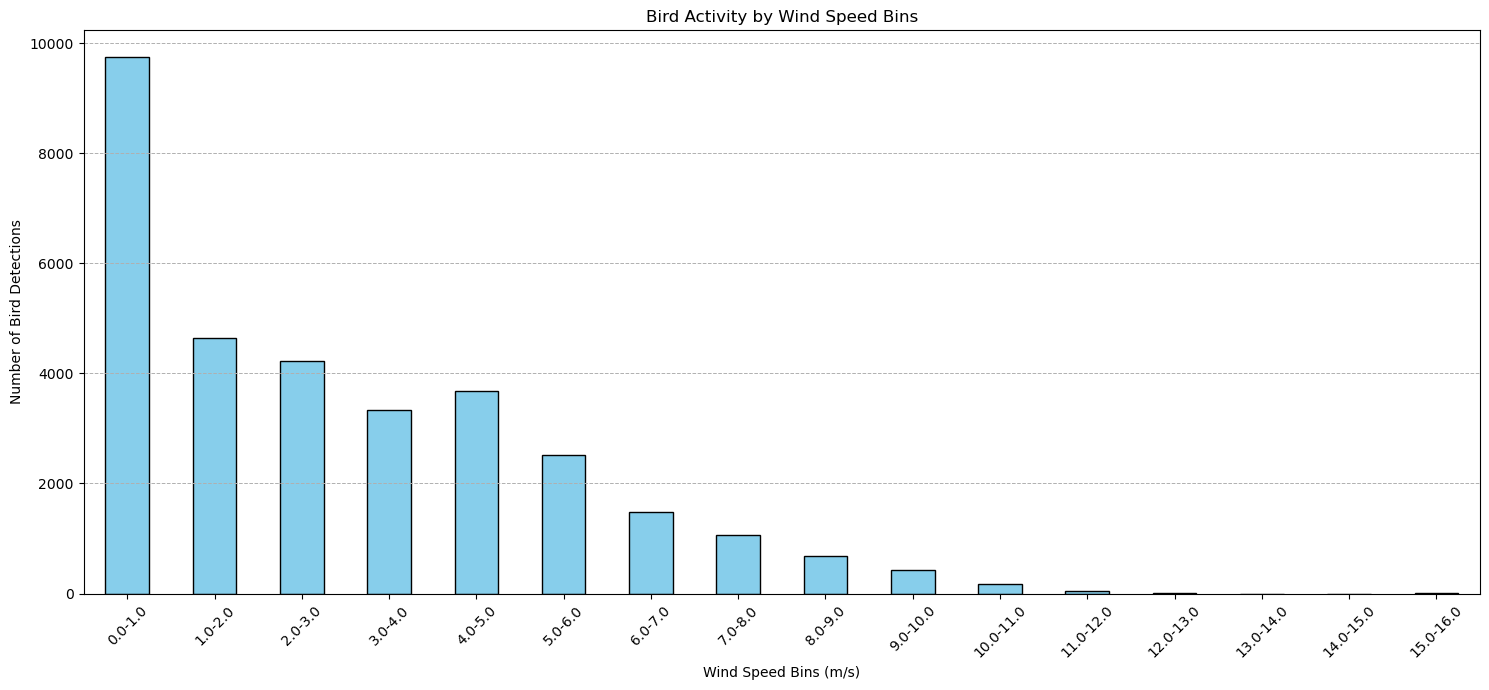

In [235]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_overall_bird_activity_by_windspeed_binned(df, wind_column='windspeedAvg', activity_column='BirdNET_Processed', bin_size=1):
    # Ensure the wind_column is numeric
    df[wind_column] = pd.to_numeric(df[wind_column], errors='coerce')
    
    # Create bins for wind speed and assign each row to a bin
    bin_edges = np.arange(0, df[wind_column].max() + bin_size, step=bin_size)
    df['wind_speed_bin'] = pd.cut(df[wind_column], bins=bin_edges, include_lowest=True, labels=[f'{edge}-{edge + bin_size}' for edge in bin_edges[:-1]])
    
    # Aggregate bird detections by wind speed bin
    binned_counts = df.groupby('wind_speed_bin')[activity_column].count()
    
    # Plot
    plt.figure(figsize=(15, 7))
    binned_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Bird Activity by Wind Speed Bins')
    plt.xlabel('Wind Speed Bins (m/s)')
    plt.ylabel('Number of Bird Detections')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()

# Assuming TP_df is your DataFrame
plot_overall_bird_activity_by_windspeed_binned(TP_df)





/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_86343/702743497.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_counts = df.groupby('wind_speed_bin')[activity_column].count()


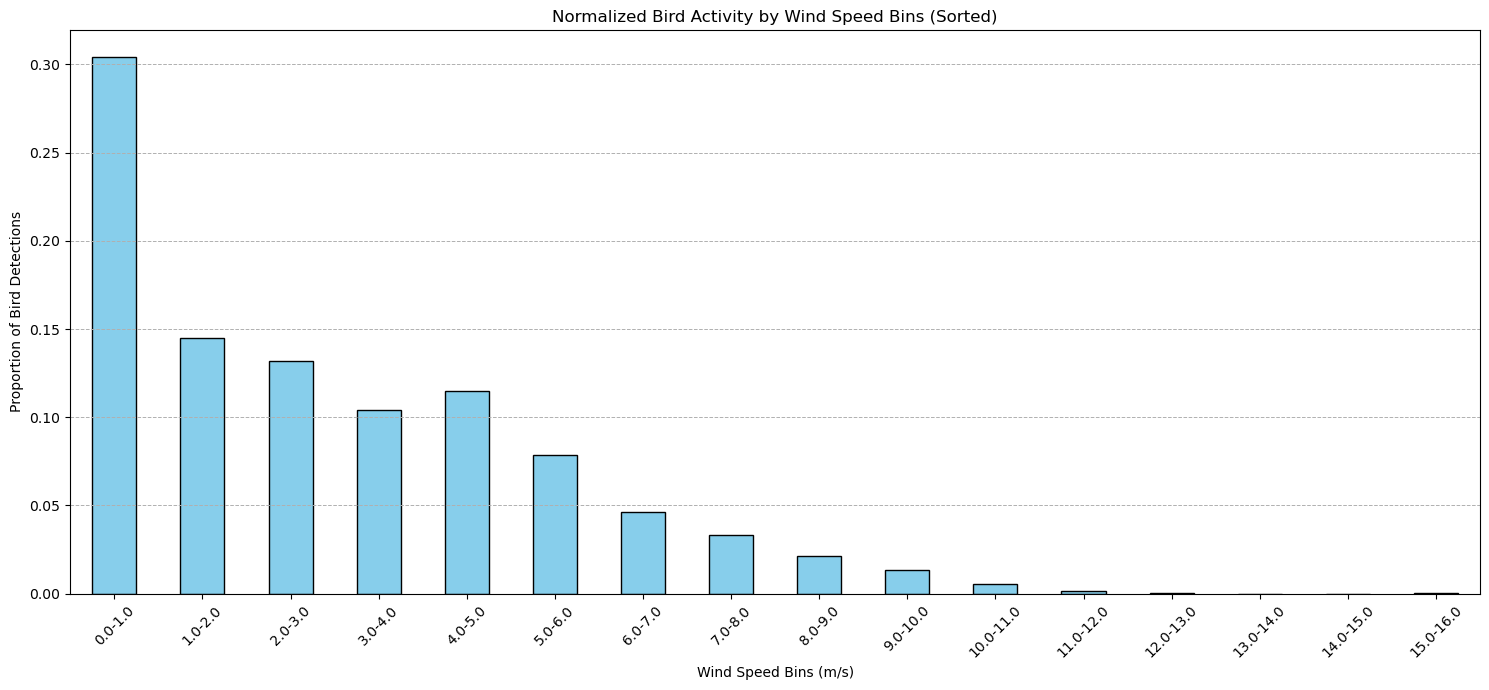

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_normalized_bird_activity_by_windspeed_sorted(df, wind_column='windspeedAvg', activity_column='BirdNET_Processed', bin_size=1):
    # Ensure the wind_column is numeric
    df[wind_column] = pd.to_numeric(df[wind_column], errors='coerce')
    
    # Create bins for wind speed and assign each row to a bin
    bin_edges = np.arange(0, df[wind_column].max() + bin_size, step=bin_size)
    bin_labels = [f'{edge}-{edge + bin_size}' for edge in bin_edges[:-1]]
    df['wind_speed_bin'] = pd.cut(df[wind_column], bins=bin_edges, include_lowest=True, labels=bin_labels)
    
    # Aggregate bird detections by wind speed bin
    binned_counts = df.groupby('wind_speed_bin')[activity_column].count()

    # Normalize the bird detections to get the proportion in each bin
    total_detections = binned_counts.sum()
    binned_counts_normalized = binned_counts / total_detections

    # Extract the left edge of each bin for sorting
    sorted_index = sorted(binned_counts_normalized.index, key=lambda x: float(x.split('-')[0]))
    binned_counts_normalized_sorted = binned_counts_normalized.reindex(sorted_index)

    # Plotting
    plt.figure(figsize=(15, 7))
    binned_counts_normalized_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Normalized Bird Activity by Wind Speed Bins (Sorted)')
    plt.xlabel('Wind Speed Bins (m/s)')
    plt.ylabel('Proportion of Bird Detections')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()

# Assuming TP_df is your DataFrame
plot_normalized_bird_activity_by_windspeed_sorted(TP_df)


/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_86343/946142667.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_counts = df.groupby('wind_speed_bin')[activity_column].count()


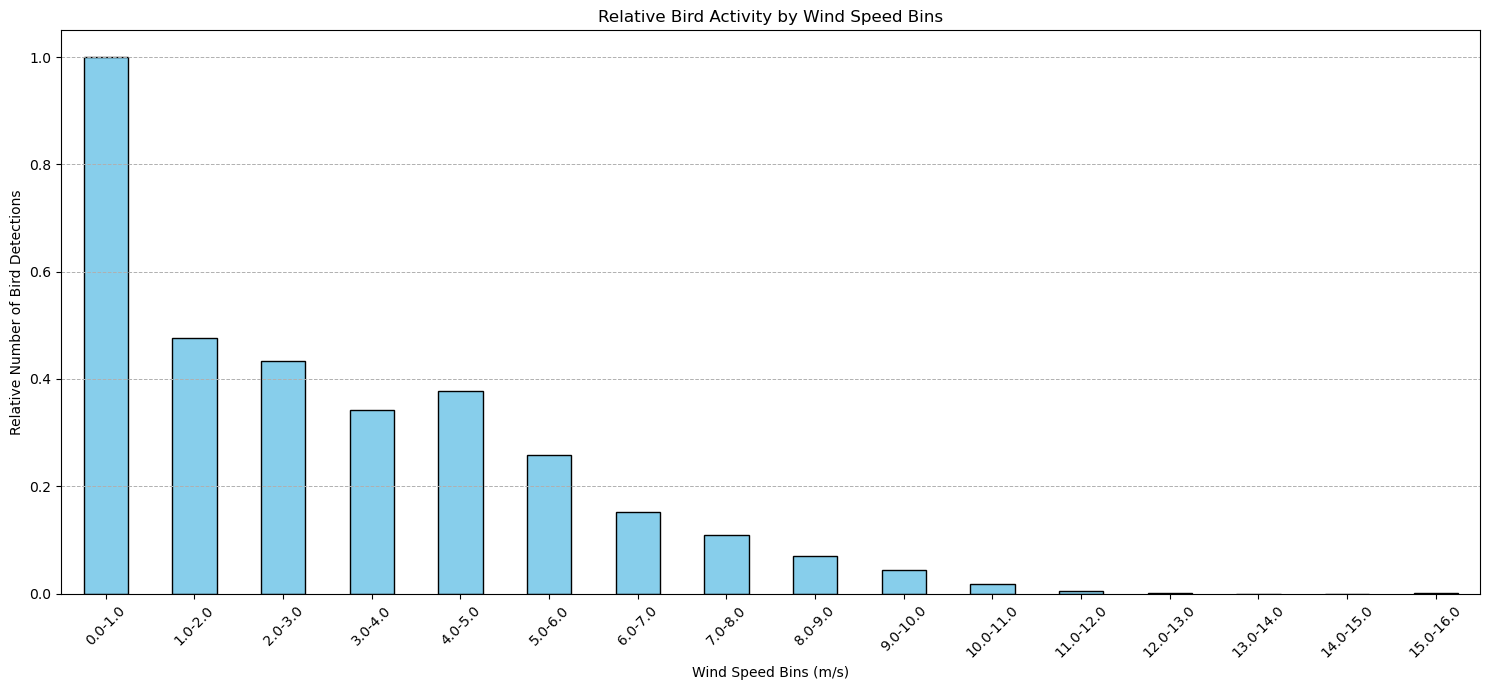

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_relative_bird_activity_by_windspeed(df, wind_column='windspeedAvg', activity_column='BirdNET_Processed', bin_size=1):
    # Ensure the wind_column is numeric
    df[wind_column] = pd.to_numeric(df[wind_column], errors='coerce')
    
    # Create bins for wind speed and assign each row to a bin
    bin_edges = np.arange(0, df[wind_column].max() + bin_size, step=bin_size)
    bin_labels = [f'{edge}-{edge + bin_size}' for edge in bin_edges[:-1]]
    df['wind_speed_bin'] = pd.cut(df[wind_column], bins=bin_edges, include_lowest=True, labels=bin_labels)
    
    # Aggregate bird detections by wind speed bin
    binned_counts = df.groupby('wind_speed_bin')[activity_column].count()
    
    # Normalize the bird detections within each bin to the maximum count to show relative distribution
    binned_counts_relative = binned_counts / binned_counts.max()

    # Plotting
    plt.figure(figsize=(15, 7))
    binned_counts_relative.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Relative Bird Activity by Wind Speed Bins')
    plt.xlabel('Wind Speed Bins (m/s)')
    plt.ylabel('Relative Number of Bird Detections')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()

# Assuming TP_df is your DataFrame
plot_relative_bird_activity_by_windspeed(TP_df)


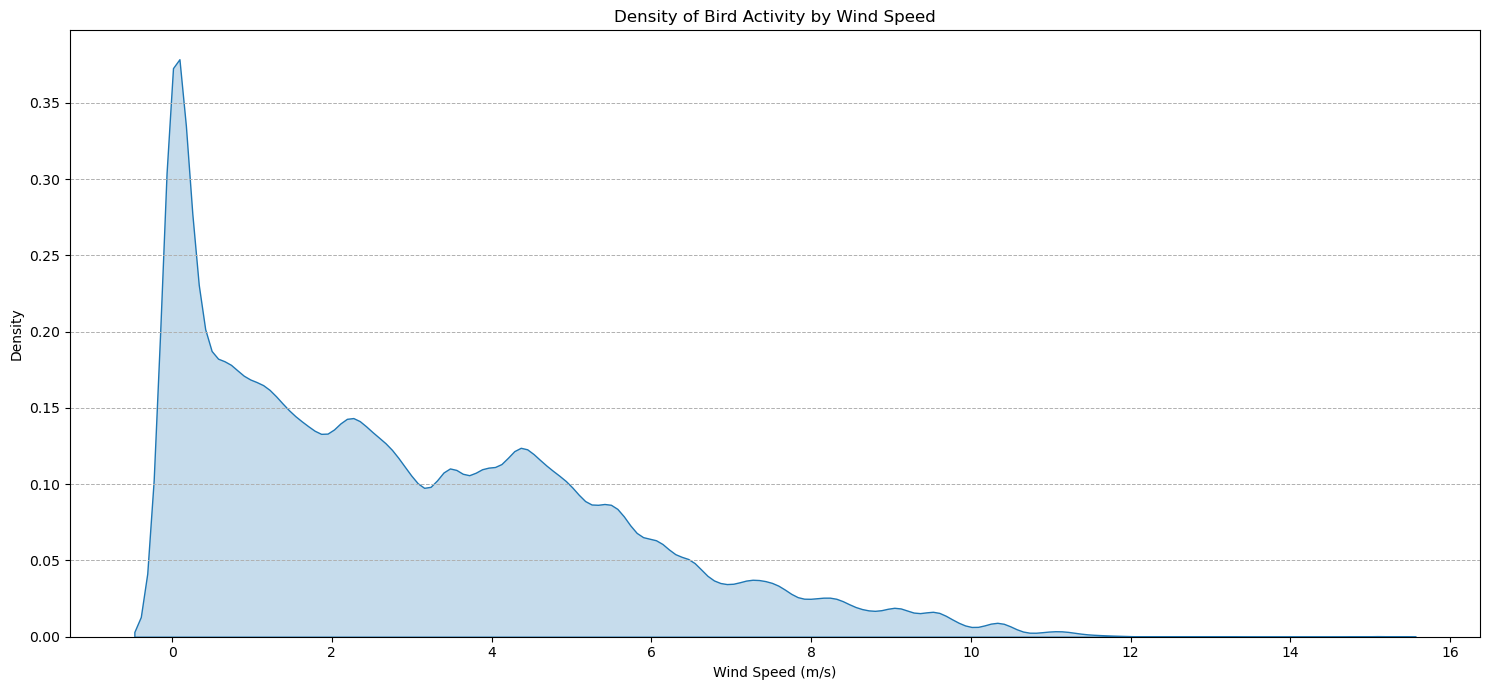

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def kdeplot_bird_activity_by_windspeed(df, wind_column='windspeedAvg'):
    # Ensure the wind_column is numeric
    df[wind_column] = pd.to_numeric(df[wind_column], errors='coerce')
    
    # Drop NaN values for the KDE plot
    wind_speeds = df[wind_column].dropna()
    
    # Create KDE plot
    plt.figure(figsize=(15, 7))
    sns.kdeplot(wind_speeds, bw_adjust=0.5, fill=True)
    
    # Customizing the plot
    plt.title('Density of Bird Activity by Wind Speed')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()

# Assuming TP_df is your DataFrame
kdeplot_bird_activity_by_windspeed(TP_df)


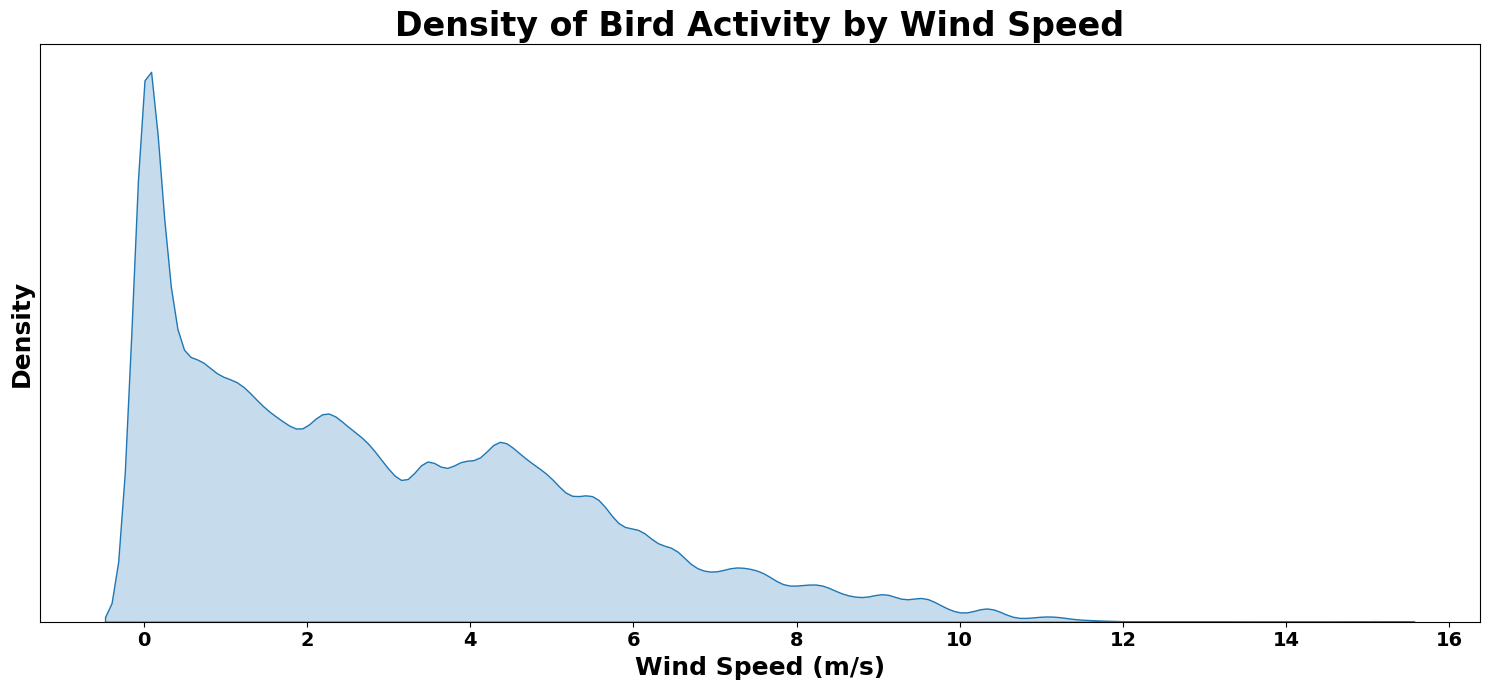

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def kdeplot_bird_activity_by_windspeed(df, wind_column='windspeedAvg'):
    # Ensure the wind_column is numeric
    df[wind_column] = pd.to_numeric(df[wind_column], errors='coerce')
    
    # Drop NaN values for the KDE plot
    wind_speeds = df[wind_column].dropna()
    
    # Create KDE plot
    plt.figure(figsize=(15, 7))
    sns.kdeplot(wind_speeds, bw_adjust=0.5, fill=True)
    
    # Customizing the plot for a scientific paper
    plt.title('Density of Bird Activity by Wind Speed', fontsize=24, fontweight='bold')
    plt.xlabel('Wind Speed (m/s)', fontsize=18, fontweight='bold')
    plt.ylabel('Density', fontsize=18, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold') # Adjust x-ticks font size and weight
    plt.yticks([]) # Hide y-ticks
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    
    plt.tight_layout()
    plt.show()

# Assuming TP_df is your DataFrame
kdeplot_bird_activity_by_windspeed(TP_df)


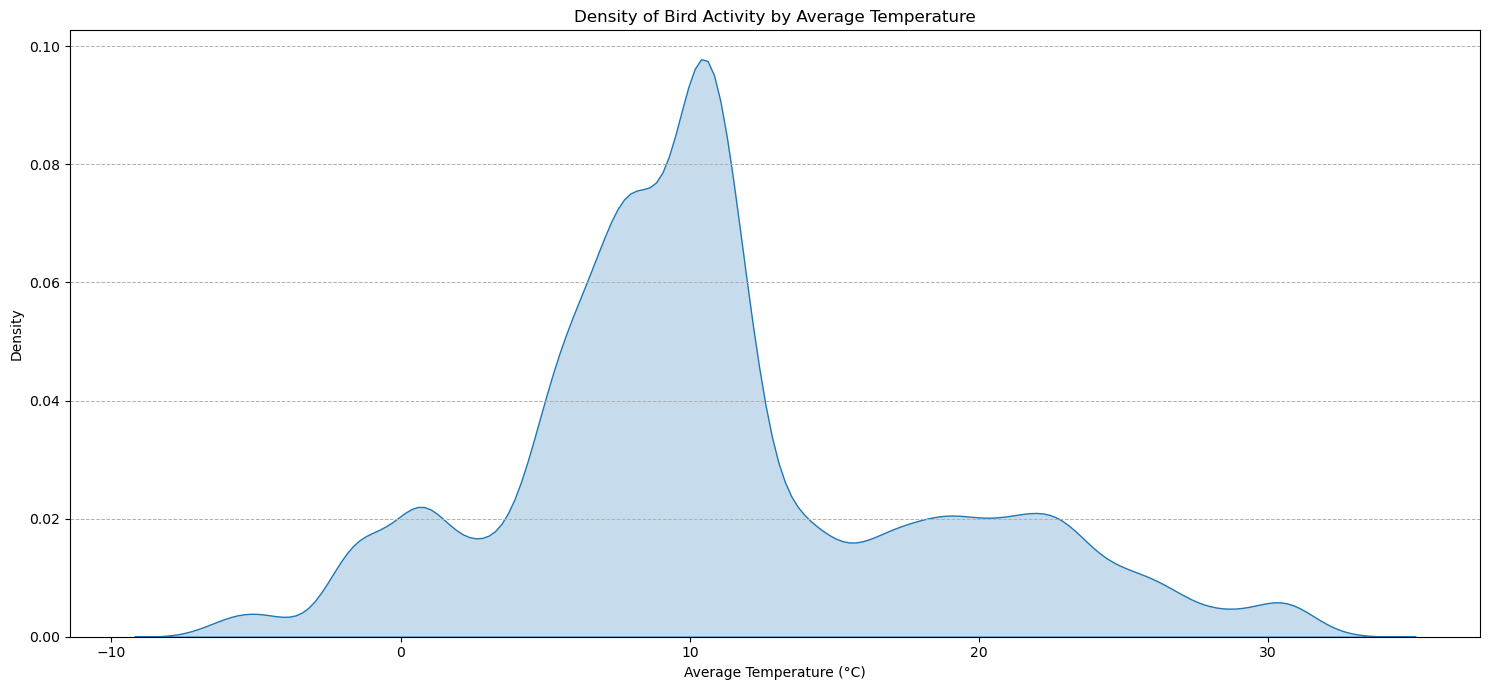

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def kdeplot_bird_activity_by_temperature(df, temp_column='tempAve'):
    # Ensure the temp_column is numeric
    df[temp_column] = pd.to_numeric(df[temp_column], errors='coerce')
    
    # Drop NaN values for the KDE plot
    temperatures = df[temp_column].dropna()
    
    # Create KDE plot
    plt.figure(figsize=(15, 7))
    sns.kdeplot(temperatures, bw_adjust=1.0, fill=True)
    
    # Customizing the plot
    plt.title('Density of Bird Activity by Average Temperature')
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()

# Assuming TP_df is your DataFrame
kdeplot_bird_activity_by_temperature(TP_df)


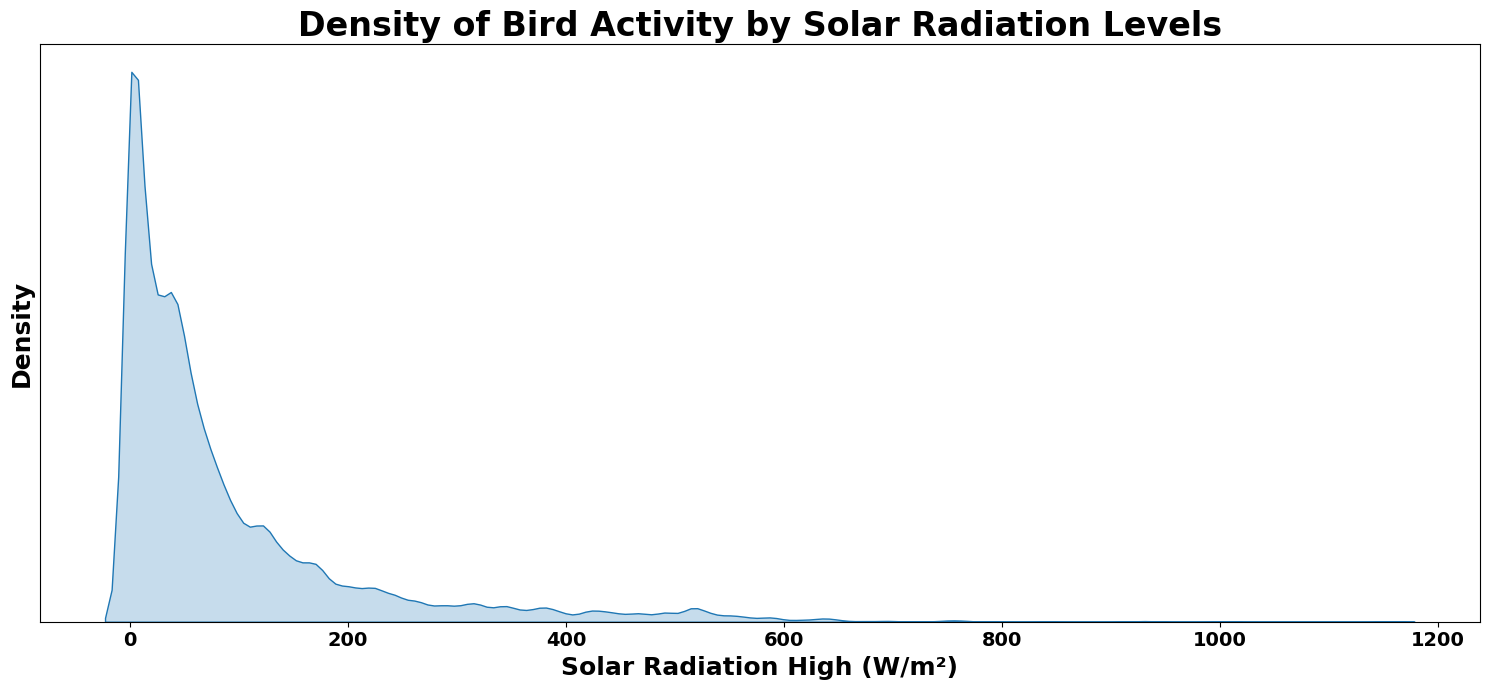

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def kdeplot_bird_activity_by_solar_radiation(df, solar_column='solarRadiationHigh'):
    # Ensure the solar_column is numeric
    df[solar_column] = pd.to_numeric(df[solar_column], errors='coerce')
    
    # Drop NaN values for the KDE plot and filter out negative solar radiation values
    solar_radiation = df[solar_column].dropna()
    solar_radiation = solar_radiation[solar_radiation >= 0]
    
    # Create KDE plot
    plt.figure(figsize=(15, 7))
    sns.kdeplot(solar_radiation, bw_adjust=0.5, fill=True)
    
    # Customizing the plot for a scientific paper
    plt.title('Density of Bird Activity by Solar Radiation Levels', fontsize=24, fontweight='bold')
    plt.xlabel('Solar Radiation High (W/m²)', fontsize=18, fontweight='bold')
    plt.ylabel('Density', fontsize=18, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')  # Adjust x-ticks font size and weight
    plt.yticks([])  # Hide y-ticks
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    
    plt.tight_layout()
    plt.show()

# Assuming TP_df is your DataFrame
kdeplot_bird_activity_by_solar_radiation(TP_df)



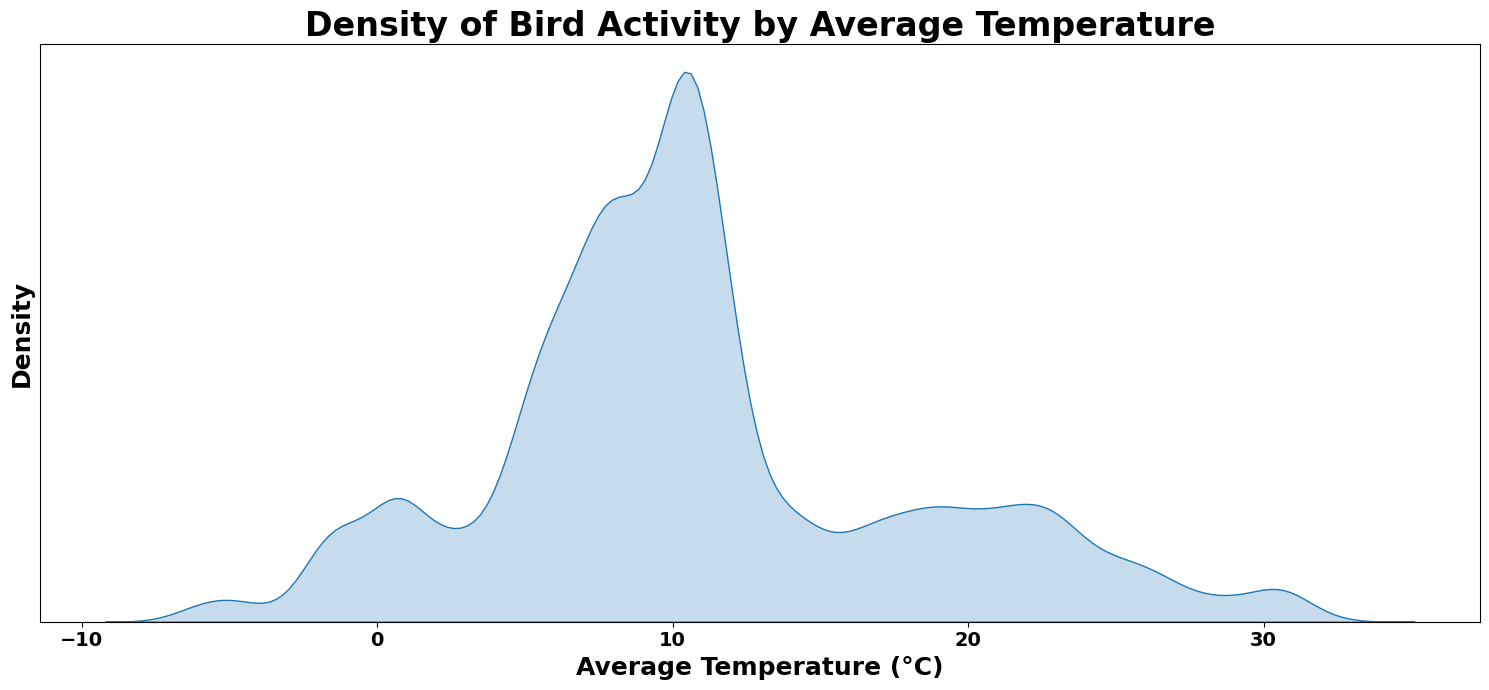

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def kdeplot_bird_activity_by_temperature(df, temp_column='tempAve'):
    # Ensure the temp_column is numeric
    df[temp_column] = pd.to_numeric(df[temp_column], errors='coerce')
    
    # Drop NaN values for the KDE plot
    temperatures = df[temp_column].dropna()
    
    # Create KDE plot
    plt.figure(figsize=(15, 7))
    sns.kdeplot(temperatures, bw_adjust=1.0, fill=True)
    
    # Customizing the plot for a scientific paper
    plt.title('Density of Bird Activity by Average Temperature', fontsize=24, fontweight='bold')
    plt.xlabel('Average Temperature (°C)', fontsize=18, fontweight='bold')
    plt.ylabel('Density', fontsize=18, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold') # Adjust x-ticks font size and weight
    plt.yticks([]) # Hide y-ticks
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    
    plt.tight_layout()
    plt.show()

# Assuming TP_df is your DataFrame
kdeplot_bird_activity_by_temperature(TP_df)


In [233]:
TP_df[[
       'wudate', 'precipRate', 'pressureMax', 'dewptAvg', 'windgustHigh',
       'windspeedAvg', 'tempAve', 'humidityAvg', 'winddirAvg', 'uvHigh',
       'solarRadiationHigh', 'BirdNET', 'MIT_AST_label',
       'sound_class_label', 'BirdNET_Processed', 'sound_class_label_Processed'
       ]].head()

,wudate,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh,BirdNET,MIT_AST_label,sound_class_label,BirdNET_Processed,sound_class_label_Processed
datetime,,,,,,,,,,,,,,,,
2023-08-11 17:59:40,20230811,0.0,1018.32,20.1,3.5,0.8,28.0,62.4,188.0,4.0,468.9,Columba palumbus_Common Wood-Pigeon,Caw,bird,Bird,Bird
2023-08-11 17:59:43,20230811,0.0,1018.32,20.1,3.5,0.8,28.0,62.4,188.0,4.0,468.9,Columba palumbus_Common Wood-Pigeon,Bird,bird,Bird,Bird
2023-08-11 17:59:54,20230811,0.0,1018.32,20.1,3.5,0.8,28.0,62.4,188.0,4.0,468.9,Corvus monedula_Eurasian Jackdaw,Squawk,bird,Bird,Bird
2023-08-11 18:00:03,20230811,0.0,1018.32,20.1,3.5,0.8,28.0,62.4,188.0,4.0,468.9,Corvus monedula_Eurasian Jackdaw,Caw,bird,Bird,Bird
2023-08-11 18:00:13,20230811,0.0,1018.32,20.1,3.5,0.8,28.0,62.4,188.0,4.0,468.9,Columba palumbus_Common Wood-Pigeon,Bird,bird,Bird,Bird


count    32042.000000
mean        89.873307
std        121.585683
min          0.000000
25%         12.100000
50%         45.900000
75%        114.500000
max       1155.600000
Name: solarRadiationHigh, dtype: float64

/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_61026/3020325239.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_counts = df.groupby('pressure_bin')[activity_column].count()


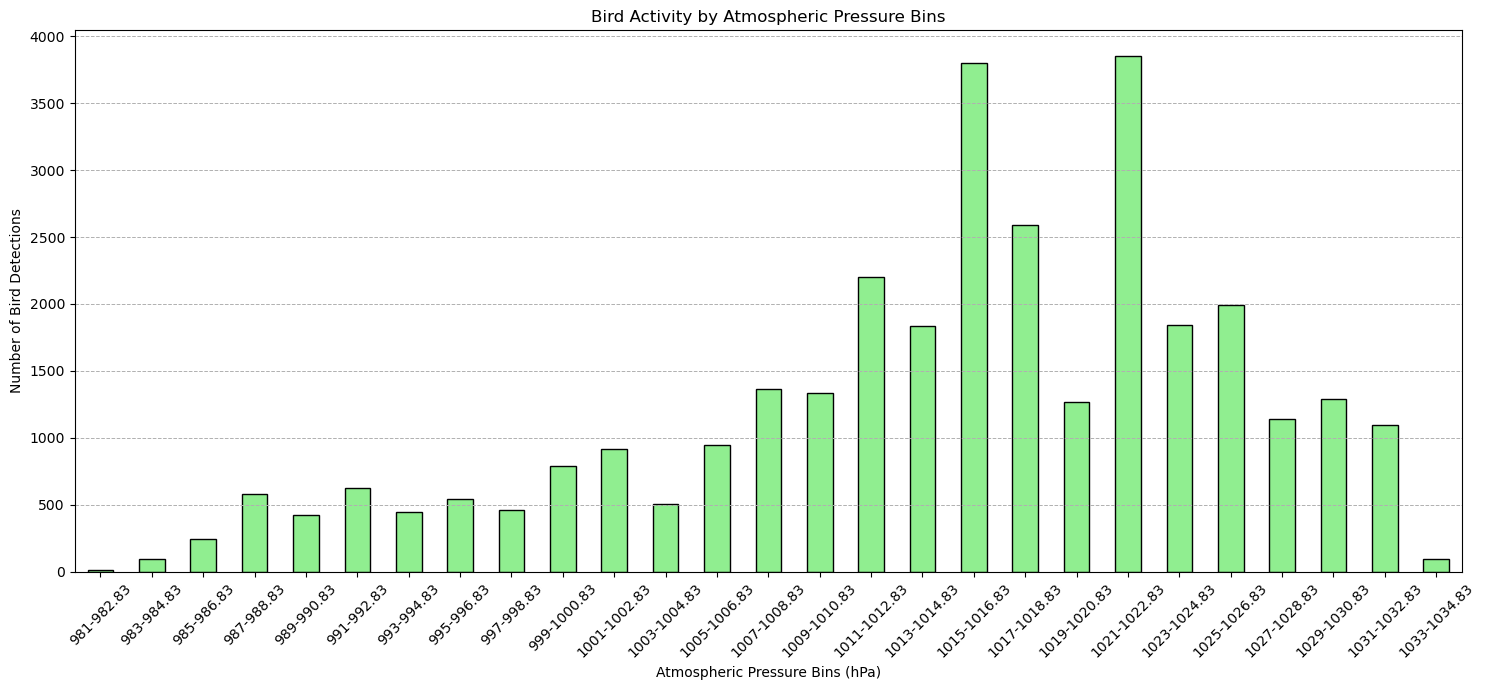

In [238]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_overall_bird_activity_by_pressure_binned(df, pressure_column='pressureMax', activity_column='BirdNET_Processed', bin_size=2):
    # Ensure the pressure column is numeric
    df[pressure_column] = pd.to_numeric(df[pressure_column], errors='coerce')
    
    # Create bins for atmospheric pressure and assign each row to a bin
    bin_edges = np.arange(df[pressure_column].min(), df[pressure_column].max() + bin_size, step=bin_size)
    df['pressure_bin'] = pd.cut(df[pressure_column], bins=bin_edges, include_lowest=True, labels=[f'{edge:.0f}-{edge + bin_size}' for edge in bin_edges[:-1]])
    
    # Aggregate bird detections by pressure bin
    binned_counts = df.groupby('pressure_bin')[activity_column].count()
    
    # Plot
    plt.figure(figsize=(15, 7))
    binned_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title('Bird Activity by Atmospheric Pressure Bins')
    plt.xlabel('Atmospheric Pressure Bins (hPa)')
    plt.ylabel('Number of Bird Detections')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()

# Assuming TP_df is your DataFrame
plot_overall_bird_activity_by_pressure_binned(TP_df)


/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_61026/2598166701.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_counts = df.groupby('solar_radiation_bin')[activity_column].count()


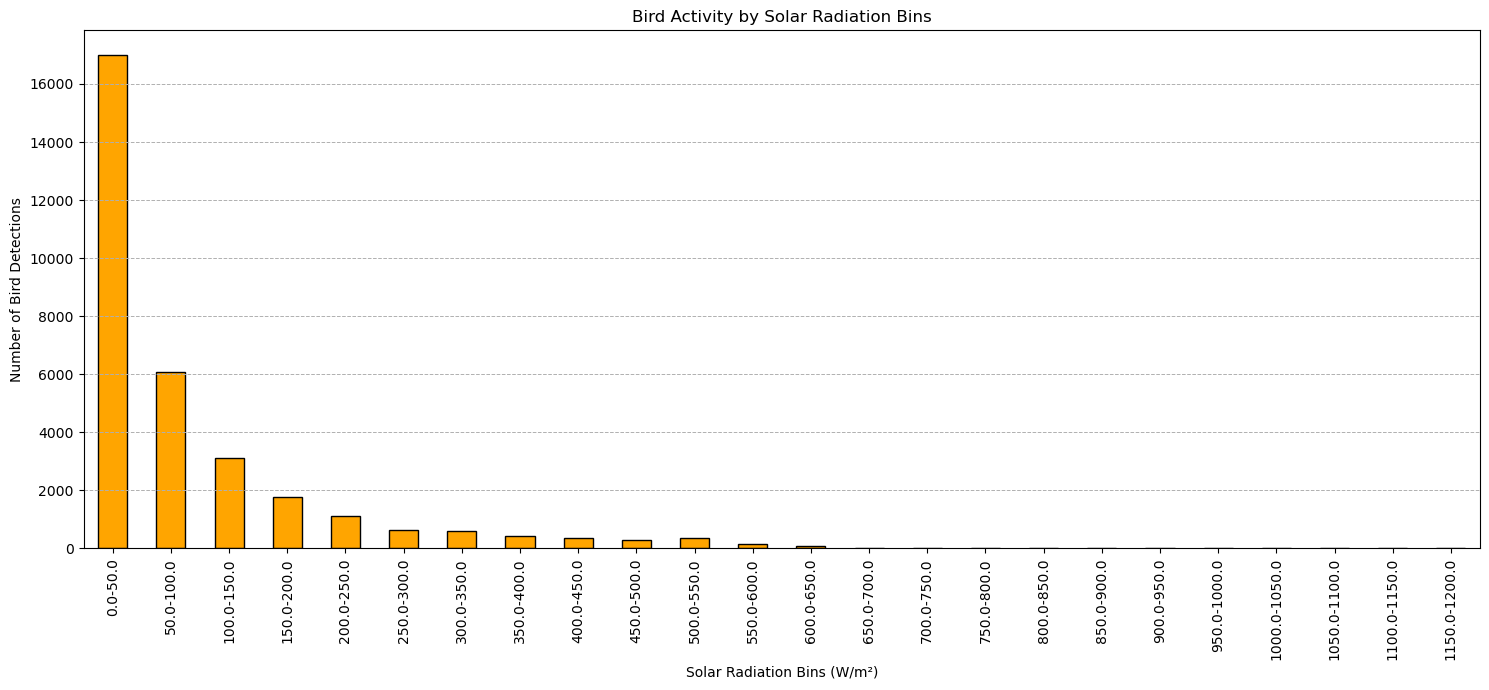

In [240]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_overall_bird_activity_by_solar_radiation_binned(df, solar_column='solarRadiationHigh', activity_column='BirdNET_Processed', bin_size=50):
    # Ensure the solar radiation column is numeric
    df[solar_column] = pd.to_numeric(df[solar_column], errors='coerce')
    
    # Given the wide range of values, adjust the binning strategy accordingly
    bin_edges = np.arange(0, df[solar_column].max() + bin_size, step=bin_size)
    df['solar_radiation_bin'] = pd.cut(df[solar_column], bins=bin_edges, include_lowest=True, labels=[f'{edge}-{edge + bin_size}' for edge in bin_edges[:-1]])
    
    # Aggregate bird detections by solar radiation bin
    binned_counts = df.groupby('solar_radiation_bin')[activity_column].count()
    
    # Plot
    plt.figure(figsize=(15, 7))
    binned_counts.plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Bird Activity by Solar Radiation Bins')
    plt.xlabel('Solar Radiation Bins (W/m²)')
    plt.ylabel('Number of Bird Detections')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()

# Assuming TP_df is your DataFrame
plot_overall_bird_activity_by_solar_radiation_binned(TP_df)


/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_61026/217925744.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_counts = df.groupby('winddir_bin')[activity_column].count()


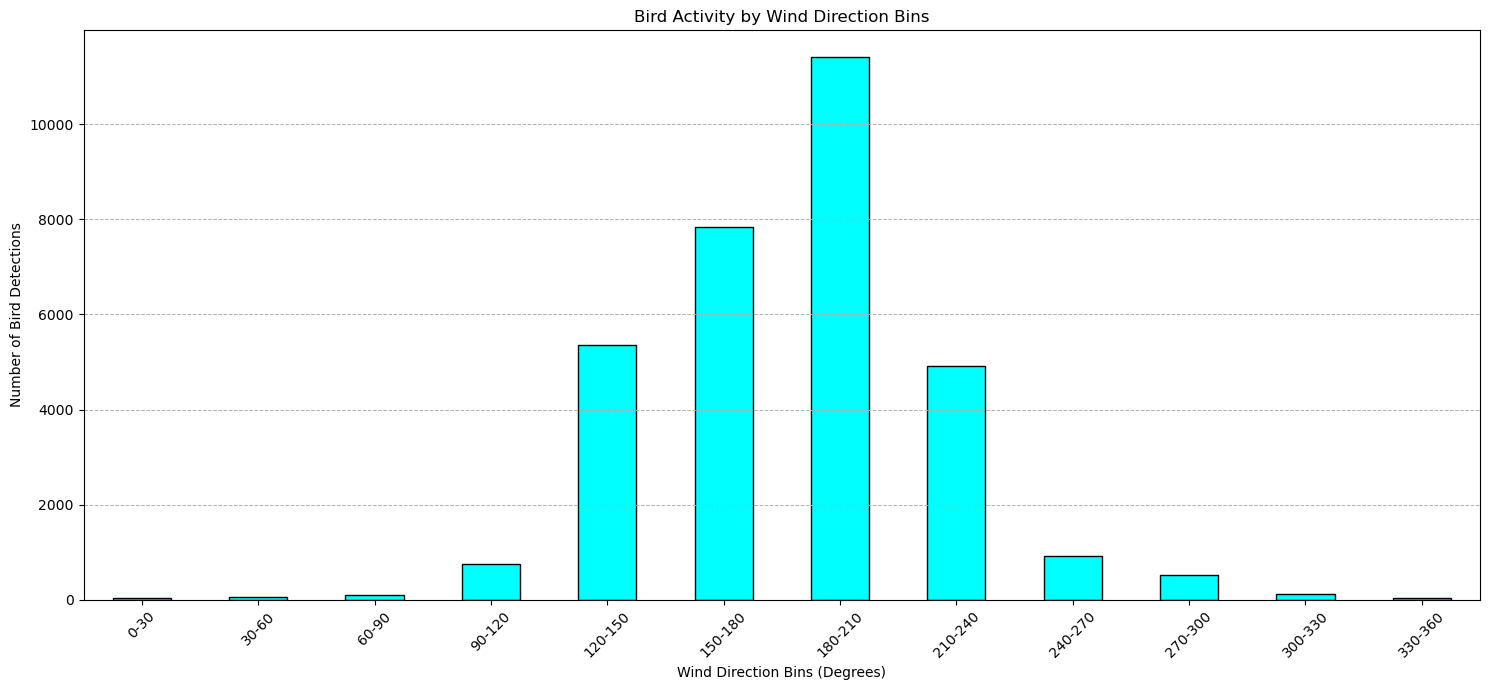

In [242]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_overall_bird_activity_by_winddir_binned(df, winddir_column='winddirAvg', activity_column='BirdNET_Processed', bin_size=30):
    # Ensure the wind direction column is numeric
    df[winddir_column] = pd.to_numeric(df[winddir_column], errors='coerce')
    
    # Create bins for wind direction, taking into account its circular nature
    bin_edges = np.arange(0, 360 + bin_size, step=bin_size)
    bin_labels = [f'{int(edge)}-{int(edge + bin_size)}' for edge in bin_edges[:-1]]
    df['winddir_bin'] = pd.cut(df[winddir_column], bins=bin_edges, include_lowest=True, labels=bin_labels)
    
    # Aggregate bird detections by wind direction bin
    binned_counts = df.groupby('winddir_bin')[activity_column].count()
    
    # Plot
    plt.figure(figsize=(15, 7))
    binned_counts.plot(kind='bar', color='cyan', edgecolor='black')
    plt.title('Bird Activity by Wind Direction Bins')
    plt.xlabel('Wind Direction Bins (Degrees)')
    plt.ylabel('Number of Bird Detections')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()

# Assuming TP_df is your DataFrame
plot_overall_bird_activity_by_winddir_binned(TP_df)


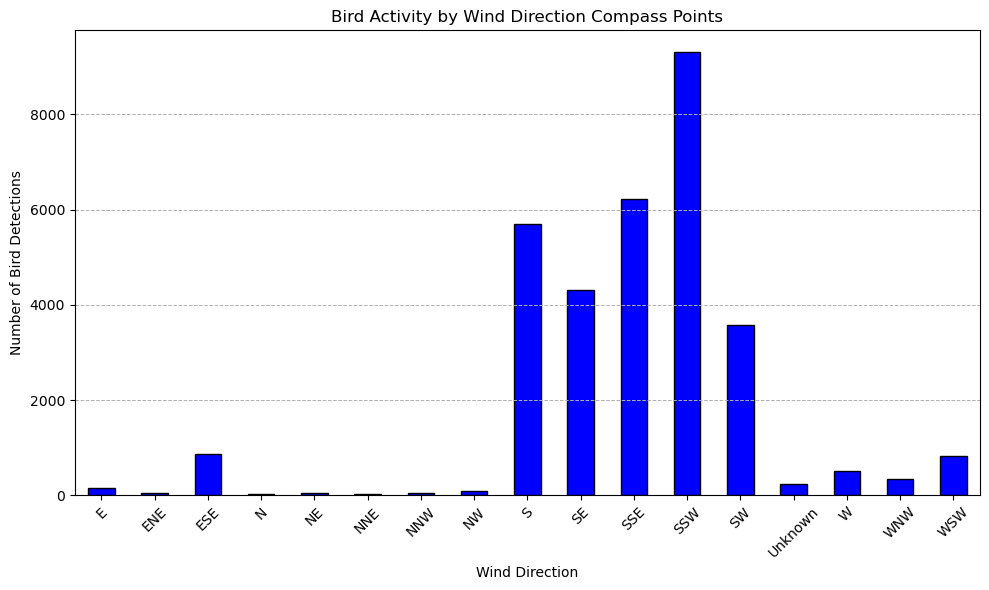

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def degrees_to_compass(degrees):
    if np.isnan(degrees):  # Check if the input is NaN
        return 'Unknown'  # Return a placeholder value for NaN
    compass_points = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                      'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    compass_idx = int((degrees / 22.5) + 0.5) % 16
    return compass_points[compass_idx]

# Assuming TP_df is your DataFrame and has a 'winddirAvg' column
# Ensure 'winddirAvg' is a float and can handle NaN values with the conversion
TP_df['winddirAvg'] = pd.to_numeric(TP_df['winddirAvg'], errors='coerce')

# Convert wind direction degrees to compass points, handling NaN values
TP_df['winddir_compass'] = TP_df['winddirAvg'].apply(degrees_to_compass)

# Aggregate bird detections by wind direction compass point
bird_activity_compass = TP_df.groupby('winddir_compass')['BirdNET_Processed'].count()

# Plot
plt.figure(figsize=(10, 6))
bird_activity_compass.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Bird Activity by Wind Direction Compass Points')
plt.xlabel('Wind Direction')
plt.ylabel('Number of Bird Detections')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()
